In [34]:
# library(SeuratObject, lib.loc = '{PATH_TO_LIBRARY_SEURAT_LIB_LOC = '{PATH_1}')LIBRARY(SEURAT)LIBRARY(SIGNAC)LIBRARY(SEURATDISK)LIBRARY(DPLYR)LIBRARY(GGPLOT2)LIBRARY(PATCHWORK)LIBRARY(STRINGR)LIBRARY(CRAYON)LIBRARY(GGEXTRA)LIBRARY(FUTURE)LIBRARY(RESHAPE2)LIBRARY(SCALES)LIBRARY(HMISC)LIBRARY(TIDYR)LIBRARY(TIDYVERSE)SOURCE('{PATH_2}}')options(future.globals.maxSize= 268435456000) # 250Gb

In [35]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/kfeng/anaconda3/envs/r42/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] pheatmap_1.0.12       rstan_2.21.8          StanHeaders_2.26.27  
 [4] lubridate_1.9.2       forcats_1.0.0         purrr_1.0.2          
 [7] readr_2.1.4           tibble_3.2.1          tidyverse_2.0.0      
[10] tidyr_1.3.0           Hmisc_5.1-0           scales_1.2.1         
[13] reshape2_1.4.4      

In [36]:
#setwd("~/prj/catatac/scripts")
plan("multicore", workers = 64)
set.seed(1234)
options(digits=2)
stats <- c()

# Load guide-capture data

Define paths etc

In [37]:
#Pass these as parametersif(!exists("papermill_run")) {    save_seurat_h5 = "NO"    run_guide_caller = "YES"    guide_assignment_method = "HTODEMUX" #"HARD_THRESHOLD"    # h5_name = '{PATH_3}'    # protosp_path = '{PATH_4}'    # library = "CRISPR9"    # tsv_path = '{PATH_TO_H5_NAME_PATH_5_H5_NAME_PATH_6_PROTOSP_PATH_PATH_7_LIBRARY_CRISPR8_TSV_PATH_PATH_8_H5_NAME_PATH_9_PROTOSP_PATH_PATH_10_LIBRARY_K562_CRISPR_TSV_PATH_PATH_11_H5_NAME_PATH_12_PROTOSP_PATH_PATH_13_LIBRARY_CRISPR_DASA1_TSV_PATH_PATH_14}'}

In [38]:
h5_w_gcap_name <- sub(".h5seurat", "_w_GUIDE_CAP.h5seurat", h5_name)# tsv_name <- paste0(tsv_path, '{PATH_15}')# tsv_name <- paste0(tsv_path, '{PATH_16}')tsv_name <- paste0(tsv_path, '{PATH_15}')

### Load protospacer file

In [39]:
df_protosp = read.table(protosp_path, header=TRUE, comment.char="")

In [40]:
tfs_w_ntctl    = unique(df_protosp$X.TargetGene)
unselect_ntctl = (tfs_w_ntctl != "NTCTL") & (tfs_w_ntctl != "NTCTRL")
tfs_to_plot    = tfs_w_ntctl[unselect_ntctl]

guides_to_plot  = df_protosp$GuideName
tfs_to_plot
guides_to_plot

[1] "ADNP"    "CHD2"    "CNOT2"   "GPBP1L1" "HIC2"    "KMT2B"   "MNT"    
 [8] "NTC28"   "NTC36"   "NTC74"   "NTC82"   "NTC98"   "PIAS1"   "PLAGL2" 
[15] "PQBP1"   "SIN3A"   "SLTM"    "TSC22D4" "YEATS4"  "ZBED6"

[1] "ADNP_1"    "ADNP_2"    "CHD2_1"    "CHD2_2"    "CNOT2_1"   "GPBP1L1_1"
 [7] "HIC2_1"    "HIC2_2"    "KMT2B_2"   "MNT_1"     "MNT_2"     "NTC28_1"  
[13] "NTC28_2"   "NTC36_1"   "NTC74_2"   "NTC82_1"   "NTC98_2"   "PIAS1_1"  
[19] "PIAS1_2"   "PLAGL2_1"  "PLAGL2_2"  "PQBP1_1"   "PQBP1_2"   "SIN3A_1"  
[25] "SIN3A_2"   "SLTM_1"    "TSC22D4_1" "YEATS4_1"  "YEATS4_2"  "ZBED6_1"  
[31] "ZBED6_2"

In [41]:
tail(df_protosp, 20)


X.TargetGene GuideName value               
12 NTC28        NTC28_1   GGTGGCCTTTGCAATTGGCG
13 NTC28        NTC28_2   GCGCTAGGAAACCAACAAGG
14 NTC36        NTC36_1   GCAGCGAGCAGCTTTTACGA
15 NTC74        NTC74_2   GGATCGCTTCAATCACCGAG
16 NTC82        NTC82_1   GACGTTGAGGGACTGTCCTA
17 NTC98        NTC98_2   GTGCGCAAACCGGATCGGGG
18 PIAS1        PIAS1_1   GCGGACAGTGCGGAACTAA 
19 PIAS1        PIAS1_2   GCTACTGGGATCCACGGAG 
20 PLAGL2       PLAGL2_1  GGTGTGGGCGACCGCGCTGA
21 PLAGL2       PLAGL2_2  GCCCCCTCAGGCCCCGGTAG
22 PQBP1        PQBP1_1   TGAAGGCCTCGTTGAGAGA 
23 PQBP1        PQBP1_2   GTATTGGTAACGTTGGGGT 
24 SIN3A        SIN3A_1   AGGCCCCGAGAACGGCGCG 
25 SIN3A        SIN3A_2   TTCCCGGGTAACAGAGAAG 
26 SLTM         SLTM_1    GCCGAGGCTGCCACCGCAC 
27 TSC22D4      TSC22D4_1 GAGCCGAGGAGCGGAGACA 
28 YEATS4       YEATS4_1  GAAGGAGGGCGAGTTACTT 
29 YEATS4       YEATS4_2  GAGAGCCACCCCGGAAGAG 
30 ZBED6        ZBED6_1   TAGCGAACACCGGATGTGG 
31 ZBED6        ZBED6_2   CCGGTGTTCGCTAATCTCG

In [42]:
#c("OTP", "MYF6", "MEIS1", "FLI1", "HHEX", "HOXA6", "ELF5", "GBX1", "DPRX", "NTCTL")
##!! tf_list   <- tfs_w_ntctl 

df_guide <- read.table(tsv_name, header = TRUE, sep = "\t", quote = "")
tf_list  <- intersect(guides_to_plot, colnames(df_guide))

guide_counts  <- t(data.matrix(df_guide[,tf_list]))
colnames(guide_counts) <- df_guide$barcode_dash
#guide_counts

Get overlapping cells

In [43]:
N_MIN_GUIDES <- 10
select_overlapping   <-
    df_guide$in_multiome & (df_guide$n_guides >= N_MIN_GUIDES)

overlapping_barcodes <- df_guide[select_overlapping, ]$barcode_dash
overlapping_barcodes <- as.vector(overlapping_barcodes)

overlapping_guide_counts <- guide_counts[, overlapping_barcodes]

n_all_overlapping <- nrow(df_guide[df_guide$in_multiome, ])
paste("Overlapping barcodes w/ min guides =", N_MIN_GUIDES,": ", length(overlapping_barcodes))
paste("Overlapping barcodes w/ min guides =", 1,": ", n_all_overlapping)


[1] "Overlapping barcodes w/ min guides = 10 :  8507"

[1] "Overlapping barcodes w/ min guides = 1 :  8508"

In [44]:
overlapping_guide_counts[1:10]
colnames(df_guide)

[1]   0   0   0   0   0   0   0   0   0 145

[1] "barcode"      "n_guides"     "ADNP_1"       "ADNP_2"       "BRD2_1"      
 [6] "BRD2_2"       "CHD2_1"       "CHD2_2"       "CNOT2_1"      "CNOT2_2"     
[11] "GPBP1L1_1"    "GPBP1L1_2"    "HIC2_1"       "HIC2_2"       "KMT2B_1"     
[16] "KMT2B_2"      "MNT_1"        "MNT_2"        "NTC22_1"      "NTC22_2"     
[21] "NTC28_1"      "NTC28_2"      "NTC36_1"      "NTC36_2"      "NTC74_1"     
[26] "NTC74_2"      "NTC82_1"      "NTC82_2"      "NTC98_1"      "NTC98_2"     
[31] "PHF6_1"       "PHF6_2"       "PIAS1_1"      "PIAS1_2"      "PLAGL2_1"    
[36] "PLAGL2_2"     "PQBP1_1"      "PQBP1_2"      "SIN3A_1"      "SIN3A_2"     
[41] "SLTM_1"       "SLTM_2"       "TSC22D4_1"    "TSC22D4_2"    "UBE2L3_1"    
[46] "UBE2L3_2"     "YEATS4_1"     "YEATS4_2"     "ZBED6_1"      "ZBED6_2"     
[51] "ZNF330_1"     "ZNF330_2"     "ZNF669_1"     "ZNF669_2"     "barcode_dash"
[56] "in_multiome"

In [45]:
head(overlapping_barcodes)

[1] "AAACAGCCAGTTTGTG-1" "AAACAGCCATGGCCCA-1" "AAACAGCCATTCCTCG-1"
[4] "AAACATGCAAACCTTG-1" "AAACATGCACAACAGG-1" "AAACATGCACAGACTC-1"

### Visualize pairs of guides

In [46]:
df_guide_counts = data.frame(t(guide_counts))
colnames(df_guide_counts)
length(colnames(df_guide_counts))

[1] "ADNP_1"    "ADNP_2"    "CHD2_1"    "CHD2_2"    "CNOT2_1"   "GPBP1L1_1"
 [7] "HIC2_1"    "HIC2_2"    "KMT2B_2"   "MNT_1"     "MNT_2"     "NTC28_1"  
[13] "NTC28_2"   "NTC36_1"   "NTC74_2"   "NTC82_1"   "NTC98_2"   "PIAS1_1"  
[19] "PIAS1_2"   "PLAGL2_1"  "PLAGL2_2"  "PQBP1_1"   "PQBP1_2"   "SIN3A_1"  
[25] "SIN3A_2"   "SLTM_1"    "TSC22D4_1" "YEATS4_1"  "YEATS4_2"  "ZBED6_1"  
[31] "ZBED6_2"

[1] 31

In [47]:
# p1 <- ggplot(df_guide_counts, aes(x=ATRX_3, y=ATRX_4)) +
#     geom_point(size = .2) +
#     scale_y_continuous(trans='log10') +
#     scale_x_continuous(trans='log10')
    
# p1 <- ggExtra::ggMarginal(p1, type = "histogram")
# p1

In [48]:
df_guide_counts

ADNP_1 ADNP_2 CHD2_1 CHD2_2 CNOT2_1 GPBP1L1_1 HIC2_1 HIC2_2
AAACAGCCAAACTGTT-1 0      0       0      0     0         0         0     0    
AAACAGCCAAAGCGGC-1 0      0       0      0     0         0         0     0    
AAACAGCCAAATATCC-1 0      0       0      0     0         0         0     0    
AAACAGCCAACATAAG-1 0      0       0      0     0         0       161     0    
AAACAGCCAACCCTAA-1 0      0       2      0     0         1       106     0    
AAACAGCCAACCCTCC-1 0      0       0      0     0         0         0     0    
AAACAGCCAACCTGGT-1 0      0       0      0     0         0         0     0    
AAACAGCCAACTAACT-1 0      0       0      0     0         0         0     0    
AAACAGCCAACTAGAA-1 0      0       0      0     0         0         0     0    
AAACAGCCAACTAGGG-1 0      0       0      0     0         0         0     0    
AAACAGCCAAGCCACT-1 0      0       0      0     0        66       114     0    
AAACAGCCAAGCGAGC-1 0      0       1      0     0         2         0     0    
AAACAGCCAAGCGATG-1 0      0       0      0     0         0         0     0    
AAACAGCCAAGCTAAA-1 0      0       0      0     0         0         0     0    
AAACAGCCAAGCTTAT-1 0      0       1      0     0         0         0     0    
AAACAGCCAAGGTCCT-1 0      0       0      0     0         0         1     0    
AAACAGCCAAGTAAGC-1 0      0       0      0     0         1         0     0    
AAACAGCCAAGTGAAC-1 0      0       0      0     0         0         0     0    
AAACAGCCAATAACGA-1 0      0      34      0     0         0         0    46    
AAACAGCCAATAAGCA-1 0      0      54      0     0        65         0     0    
AAACAGCCAATAGCAA-1 0      1       0      0     0         0         0     0    
AAACAGCCAATATGGA-1 0      0       0     39     0        54         0     0    
AAACAGCCAATCATGT-1 0      0       0      0     0         0         0     0    
AAACAGCCAATCGCAC-1 0      0       0      0     0         0         0     0    
AAACAGCCAATTAGGA-1 0      0       0      0     0        17         0     0    
AAACAGCCAATTGAAG-1 0      0       0      0     0       112         0     0    
AAACAGCCACAAACTT-1 0      0       0      0     0         0         0     0    
AAACAGCCACAAGCCT-1 0      0       0      0     0         0         0     0    
AAACAGCCACAATTAC-1 0      0       0      0     0         0         0     0    
AAACAGCCACACAATT-1 0      0       0      0     0         0        44     0    
⋮                  ⋮      ⋮      ⋮      ⋮      ⋮       ⋮         ⋮      ⋮     
TTTGTTGGTTAGGCTA-1   0     0      17     0     0         0       28      0    
TTTGTTGGTTAGGTTG-1   0     0       0     0     0         0        0      0    
TTTGTTGGTTATCCGT-1   0     0       0     0     0       240        0      0    
TTTGTTGGTTCACTGT-1   0     0       0     0     0         0        0      0    
TTTGTTGGTTCCGGGA-1   0     0       0     0     0         0        0      0    
TTTGTTGGTTCCTGTG-1   0    74     132     0     0         0        0      0    
TTTGTTGGTTCGGGAT-1   0     0       0     0     0         0        0      0    
TTTGTTGGTTCGGTAA-1   0     0       0     0     0         0        0      0    
TTTGTTGGTTGAGCCG-1   0     0       0     0     0         0        1      0    
TTTGTTGGTTGCAATG-1   0     0     128     0     0         0        0     38    
TTTGTTGGTTGCACAA-1   0     0       0     0     0         0        0      0    
TTTGTTGGTTGCGGAT-1   0     0       0    48     0         0        0      0    
TTTGTTGGTTGCTGGG-1   0     0       0     0     0         0        0      0    
TTTGTTGGTTGGCCGA-1   0     0       0     0     0         0        1      0    
TTTGTTGGTTGGTTGA-1   0     0       0     0     0         0        0      0    
TTTGTTGGTTGTCATC-1   0     0       0     0     0         0        0      0    
TTTGTTGGTTGTCCAT-1 111     0       0     0     0         0        0      0    
TTTGTTGGTTGTGACA-1   0     0      23     0     0         0        0      0    
TTTGTTGGTTGTTGCT-1   0     0       0     0     0         0        0  

Warning message:
“Removed 3529 rows containing missing values (`geom_point()`).”


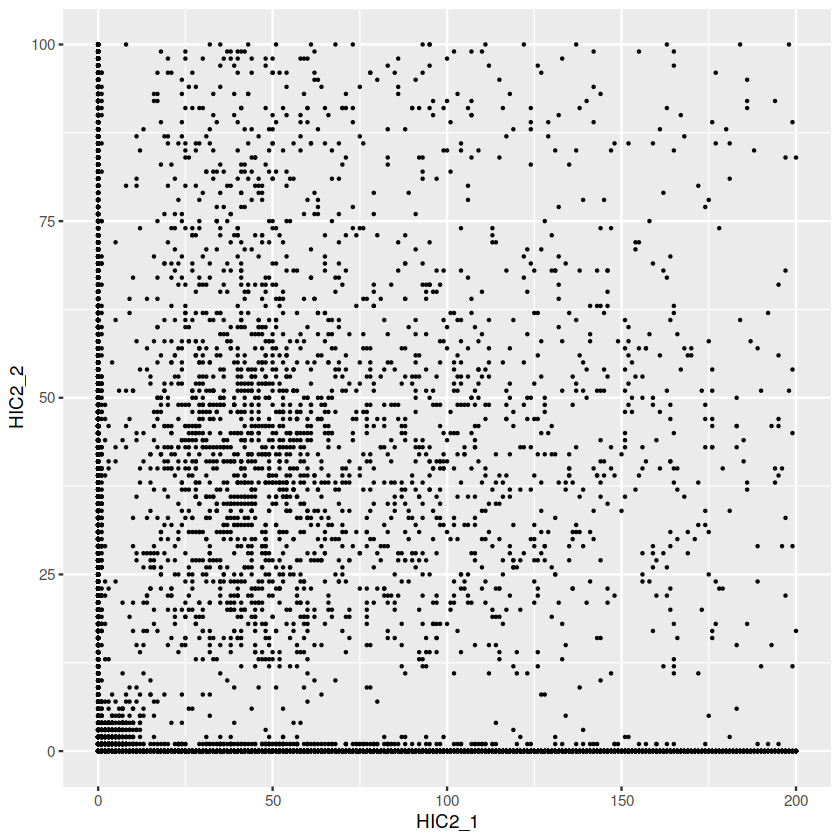

In [49]:
p2 <- ggplot(df_guide_counts, aes(x=HIC2_1, y=HIC2_2)) +
    geom_point(size = .2) +
    xlim(0, 200) +
    ylim(0, 100)
    #scale_y_continuous(trans='log10') +
    #scale_x_continuous(trans='log10')

#p2 <- ggExtra::ggMarginal(p2, type = "histogram")

p2

## Plot stats

Mean #guides per cell 1981

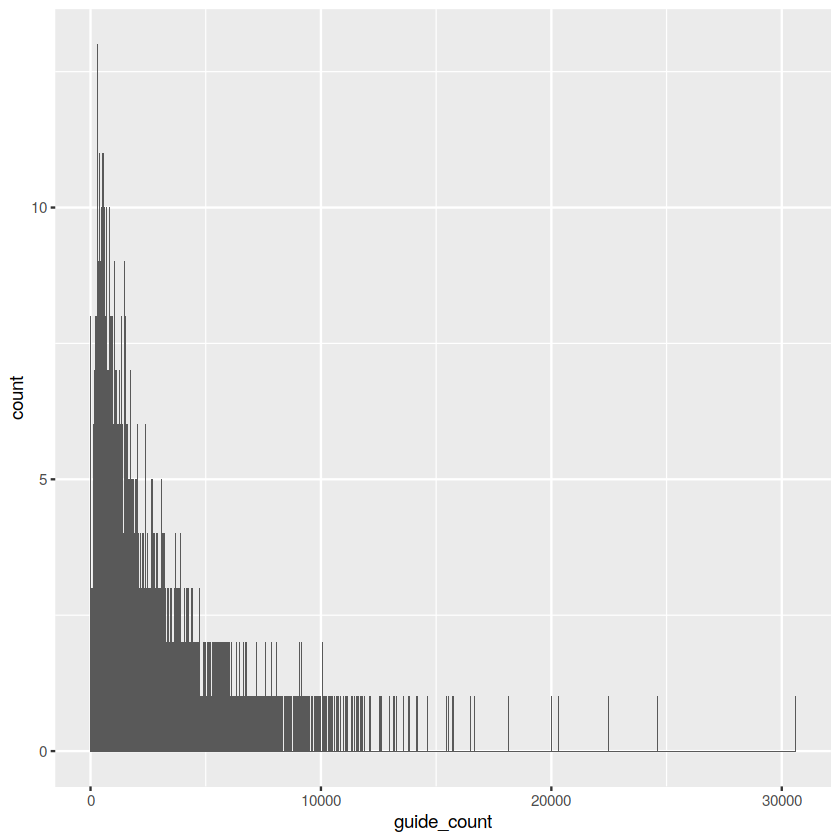

In [50]:
df_guide_counts_per_cell <- data.frame(guide_count=colSums(overlapping_guide_counts))
mean_guides_per_cell = mean(df_guide_counts_per_cell$guide_count)
cat(blue("Mean #guides per cell"), mean_guides_per_cell)

ggplot(df_guide_counts_per_cell, aes(x=guide_count)) +
    geom_histogram(binwidth=1)

No id variables; using all as measure variables



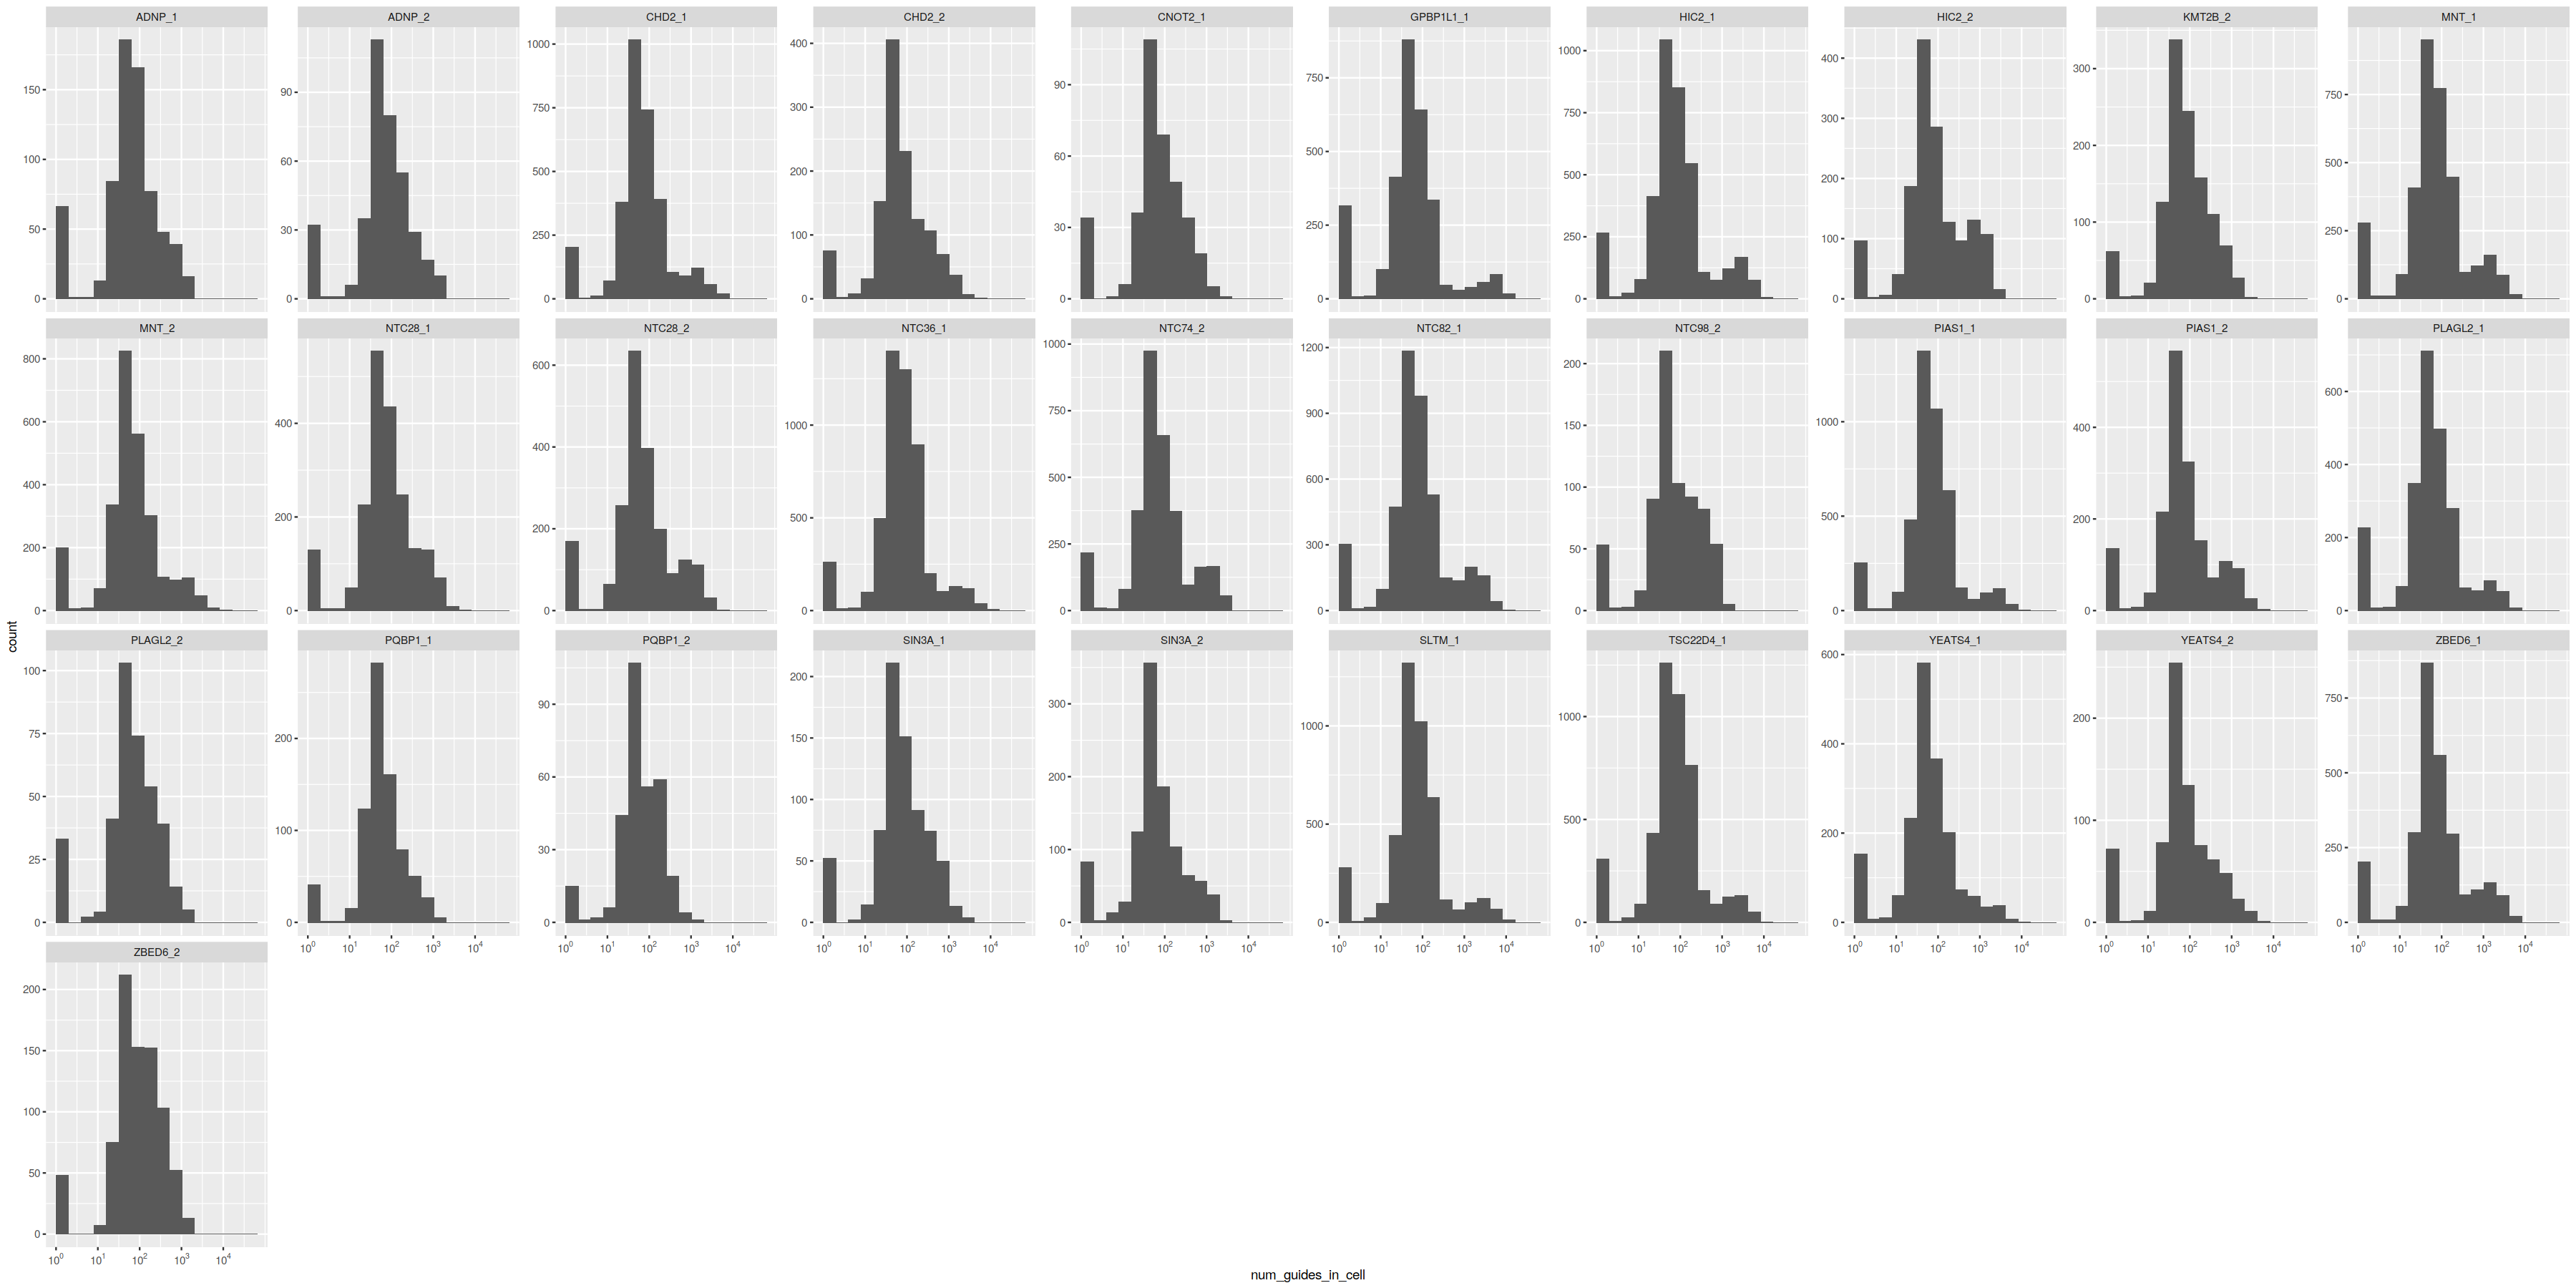

In [51]:
library(reshape2)
library(scales)
df_guide_counts_by_cell <- as.data.frame(t(overlapping_guide_counts))

d <- melt(df_guide_counts_by_cell)
d <- d[d$value > 0,]
colnames(d) = c("guide_name", "num_guides_in_cell")

bin_breaks <- c(1,2,2*2^(1:15))
options(repr.plot.width = 30, repr.plot.height = 15)
ggplot(d, aes(x = num_guides_in_cell)) + 
    geom_histogram(breaks = bin_breaks) +
    labs(y_label="count") +
    scale_x_log10(labels=trans_format('log10',math_format(10^.x)), breaks=c(1,10,100,1000,10000)) +
    facet_wrap(~guide_name, scales = "free_y", ncol =  10) 

### Load multiome seurat object

In [52]:
h5_name

[1] "/data2/kfeng/deeper_guides_dasatinib/secondary/DASA1/seurat_ngc_testing/CATATAC_CRISPR-DASA1_ONLY_SINGLETS.h5seurat"

In [53]:
if (!exists("seurat_all")) {
    seurat_all <- LoadH5Seurat(h5_name, verbose=FALSE)
}
#seurat_all <- LoadH5Seurat(h5_name, verbose=F)

Validating h5Seurat file



In [54]:
# Select cells found in guide capture
seurat     <- subset(seurat_all, cells = overlapping_barcodes)
n_multiome <- length(Cells(seurat_all))

In [55]:
# Add guide data as a new assay independent from RNA & ATAC 
if(! 'guidecapture' %in% names(seurat@assays)) {
    seurat[["guidecapture"]] <- CreateAssayObject(counts = overlapping_guide_counts)
} 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [56]:
ncol(overlapping_guide_counts)
length(overlapping_barcodes)
nrow(seurat@meta.data)

[1] 8507

[1] 8507

[1] 8507

# Guide assignment

In [57]:
X <- GetAssayData(  seurat[["guidecapture"]], "counts")model = stan_model('{PATH_17}' )guide_list = rownames(seurat[["guidecapture"]])thresholds = list()if(run_guide_caller == "YES") {    for(guide in guide_list) {        cat("Running", yellow(guide), "\n")        flush.console()        # v1 caller        # fit = callGuides( X, gene = guide, cores = 32)        # thresholds[[guide]] = getThreshold(fit)        # seurat@meta.data[guide] = fit$Classifications == 2        # v2 caller        ## Load Model Specification        ## Doing this once outside of function will speed things up         ## when calling the function more than once.        system.time({            call = callGuides( X, gene = guide, model = model)                 thresholds[[guide]] = call$Cutoff            seurat@meta.data[guide] = call$Classifications        })    }    cat(green("Completed"))}

Running ADNP-1 
Running ADNP-2 
Running CHD2-1 
Running CHD2-2 
Running CNOT2-1 
Running GPBP1L1-1 
Running HIC2-1 
Running HIC2-2 
Running KMT2B-2 
Running MNT-1 
Running MNT-2 
Running NTC28-1 
Running NTC28-2 
Running NTC36-1 
Running NTC74-2 
Running NTC82-1 
Running NTC98-2 
Running PIAS1-1 
Running PIAS1-2 


Warning message in .local(object, ...):
“non-zero return code in optimizing”


Running PLAGL2-1 
Running PLAGL2-2 
Running PQBP1-1 
Running PQBP1-2 


Warning message in min(which(min_prob_tail > 0.5)):
“no non-missing arguments to min; returning Inf”


Running SIN3A-1 
Running SIN3A-2 
Running SLTM-1 
Running TSC22D4-1 


Warning message in .local(object, ...):
“non-zero return code in optimizing”


Running YEATS4-1 
Running YEATS4-2 


Warning message in .local(object, ...):
“non-zero return code in optimizing”


Running ZBED6-1 
Running ZBED6-2 
Completed

In [58]:
head(seurat, 3)

nCount_ATAC nFeature_ATAC nCount_RNA nFeature_RNA
AAACAGCCAGTTTGTG-1 22409       9979           7540      3175        
AAACAGCCATGGCCCA-1 14982       6392          10192      3556        
AAACAGCCATTCCTCG-1  7542       3513           3789      1724        
                   orig.ident                   percent.mt nucleosome_signal
AAACAGCCAGTTTGTG-1 CATATAC_CATATAC_CRISPR-DASA1 12         0.74             
AAACAGCCATGGCCCA-1 CATATAC_CATATAC_CRISPR-DASA1 11         0.54             
AAACAGCCATTCCTCG-1 CATATAC_CATATAC_CRISPR-DASA1 18         0.42             
                   nucleosome_percentile TSS.enrichment TSS.percentile ⋯
AAACAGCCAGTTTGTG-1 0.73                  4.7            0.12           ⋯
AAACAGCCATGGCCCA-1 0.12                  5.7            0.74           ⋯
AAACAGCCATTCCTCG-1 0.00                  5.8            0.80           ⋯
                   PQBP1-1 PQBP1-2 SIN3A-1 SIN3A-2 SLTM-1 TSC22D4-1 YEATS4-1
AAACAGCCAGTTTGTG-1 FALSE   FALSE   FALSE   FALSE   FALSE  FALSE     FALSE   
AAACAGCCATGGCCCA-1 FALSE   FALSE   FALSE   FALSE   FALSE  FALSE      TRUE   
AAACAGCCATTCCTCG-1 FALSE   FALSE   FALSE   FALSE   FALSE  FALSE     FALSE   
                   YEATS4-2 ZBED6-1 ZBED6-2
AAACAGCCAGTTTGTG-1 FALSE    FALSE   FALSE  
AAACAGCCATGGCCCA-1  TRUE    FALSE    TRUE  
AAACAGCCATTCCTCG-1 FALSE    FALSE   FALSE

In [59]:
if(run_guide_caller == "YES") {
    table(call$Classifications)
}


FALSE  TRUE 
 8056   451 

In [60]:
df_thresholds = as.data.frame(t(data.frame(thresholds)))
colnames(df_thresholds) = c("threshold")
df_thresholds$guide_name = rownames(df_thresholds)
rownames(df_thresholds) =  NULL
head(df_thresholds)


threshold guide_name
1 149       ADNP.1    
2 109       ADNP.2    
3 206       CHD2.1    
4 154       CHD2.2    
5  96       CNOT2.1   
6 220       GPBP1L1.1

In [61]:
#Save the thresholds here !!!!!# if(run_guide_caller == "YES") {#     df_calls = as.data.frame(seurat@meta.data[, guide_list])#     df_calls[, 1:ncol(df_calls)] <- sapply(df_calls[, 1:ncol(df_calls)], as.logical)#     saveRDS(df_calls, '{PATH_18}' )#     write.table(df_thresholds, '{PATH_19}', row.names = F)# }

# Load the calls from file and visualize

In [62]:
guide_list = rownames(seurat[["guidecapture"]])df_calls = readRDS('{PATH_18}')df_calls[, 1:ncol(df_calls)] <- sapply(df_calls[, 1:ncol(df_calls)], as.logical)df_thresholds = read.table('{PATH_20}', header = T)df_thresholds$guide_name = gsub("\\.", "-", df_thresholds$guide_name)#seurat@meta.data = merge(seurat@meta.data, df_calls, by = 0)head(df_thresholds)

threshold guide_name
1 149       ADNP-1    
2 109       ADNP-2    
3 206       CHD2-1    
4 154       CHD2-2    
5  96       CNOT2-1   
6 220       GPBP1L1-1

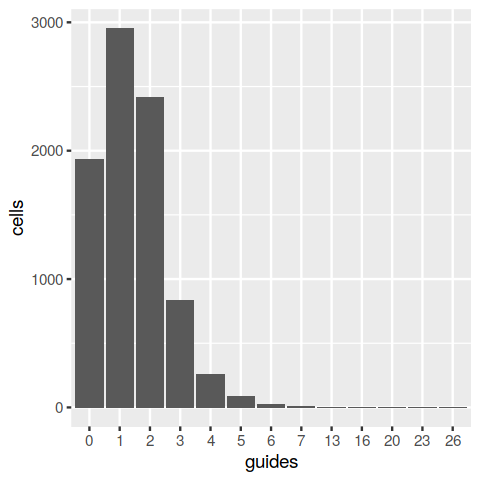

In [63]:
#table(rowSums(df_calls))
options(repr.plot.width = 4, repr.plot.height = 4)
df_dummy = as.data.frame(table(rowSums(df_calls)))
colnames(df_dummy) = c("guides", "cells")
ggplot(df_dummy, aes(x=guides, y=cells)) +
    geom_bar(stat = "identity")

In [64]:
head(df_calls)

ADNP-1 ADNP-2 CHD2-1 CHD2-2 CNOT2-1 GPBP1L1-1 HIC2-1 HIC2-2
AAACAGCCAGTTTGTG-1 FALSE  FALSE  FALSE  FALSE  FALSE   FALSE     FALSE  FALSE 
AAACAGCCATGGCCCA-1 FALSE  FALSE  FALSE  FALSE  FALSE   FALSE      TRUE  FALSE 
AAACAGCCATTCCTCG-1 FALSE  FALSE  FALSE  FALSE  FALSE   FALSE      TRUE  FALSE 
AAACATGCAAACCTTG-1 FALSE  FALSE   TRUE  FALSE  FALSE   FALSE     FALSE  FALSE 
AAACATGCACAACAGG-1 FALSE  FALSE  FALSE  FALSE  FALSE   FALSE     FALSE  FALSE 
AAACATGCACAGACTC-1 FALSE  FALSE   TRUE  FALSE  FALSE   FALSE     FALSE  FALSE 
                   KMT2B-2 MNT-1 ⋯ PQBP1-1 PQBP1-2 SIN3A-1 SIN3A-2 SLTM-1
AAACAGCCAGTTTGTG-1 FALSE   FALSE ⋯ FALSE   FALSE   FALSE   FALSE   FALSE 
AAACAGCCATGGCCCA-1 FALSE   FALSE ⋯ FALSE   FALSE   FALSE   FALSE   FALSE 
AAACAGCCATTCCTCG-1 FALSE   FALSE ⋯ FALSE   FALSE   FALSE   FALSE   FALSE 
AAACATGCAAACCTTG-1 FALSE   FALSE ⋯  TRUE   FALSE   FALSE   FALSE   FALSE 
AAACATGCACAACAGG-1 FALSE   FALSE ⋯ FALSE   FALSE   FALSE   FALSE   FALSE 
AAACATGCACAGACTC-1 FALSE   FALSE ⋯ FALSE   FALSE   FALSE   FALSE   FALSE 
                   TSC22D4-1 YEATS4-1 YEATS4-2 ZBED6-1 ZBED6-2
AAACAGCCAGTTTGTG-1 FALSE     FALSE    FALSE    FALSE   FALSE  
AAACAGCCATGGCCCA-1 FALSE      TRUE     TRUE    FALSE    TRUE  
AAACAGCCATTCCTCG-1 FALSE     FALSE    FALSE    FALSE   FALSE  
AAACATGCAAACCTTG-1 FALSE     FALSE     TRUE    FALSE   FALSE  
AAACATGCACAACAGG-1 FALSE     FALSE    FALSE    FALSE   FALSE  
AAACATGCACAGACTC-1 FALSE     FALSE    FALSE    FALSE   FALSE

In [65]:
gene_names = unique(str_split_fixed(df_protosp$Gene, "_", 2)[,1])
gene_names = df_protosp$X.TargetGene

In [66]:
# guide = "ATRX-3"
# options(repr.plot.width = 20, repr.plot.height = 20)
# select_guide_positives = seurat@meta.data[, guide] == TRUE
# cells = rownames(seurat@meta.data[select_guide_positives, guide])
# Idents(seurat) = paste0(guide, "-neg")
# Idents(seurat, cells = cells) = paste0(guide, "-pos")

# #seurat_subset = subset(seurat, cells = cells)
# #Idents(seurat) <- seurat@meta.data[, guide]
# VlnPlot(seurat, features = gene_names)

In [67]:
#table(rowSums(df_calls[,c('ATRX-4', 'ATRX-3')]))

# Viz gene expression

In [68]:
gene_targets = unique(gene_names[! grepl('NTCTL', gene_names)])
gene_targets

[1] "ADNP"    "CHD2"    "CNOT2"   "GPBP1L1" "HIC2"    "KMT2B"   "MNT"    
 [8] "NTC28"   "NTC36"   "NTC74"   "NTC82"   "NTC98"   "PIAS1"   "PLAGL2" 
[15] "PQBP1"   "SIN3A"   "SLTM"    "TSC22D4" "YEATS4"  "ZBED6"

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: NTC28, NTC36, NTC74, NTC82, NTC98”


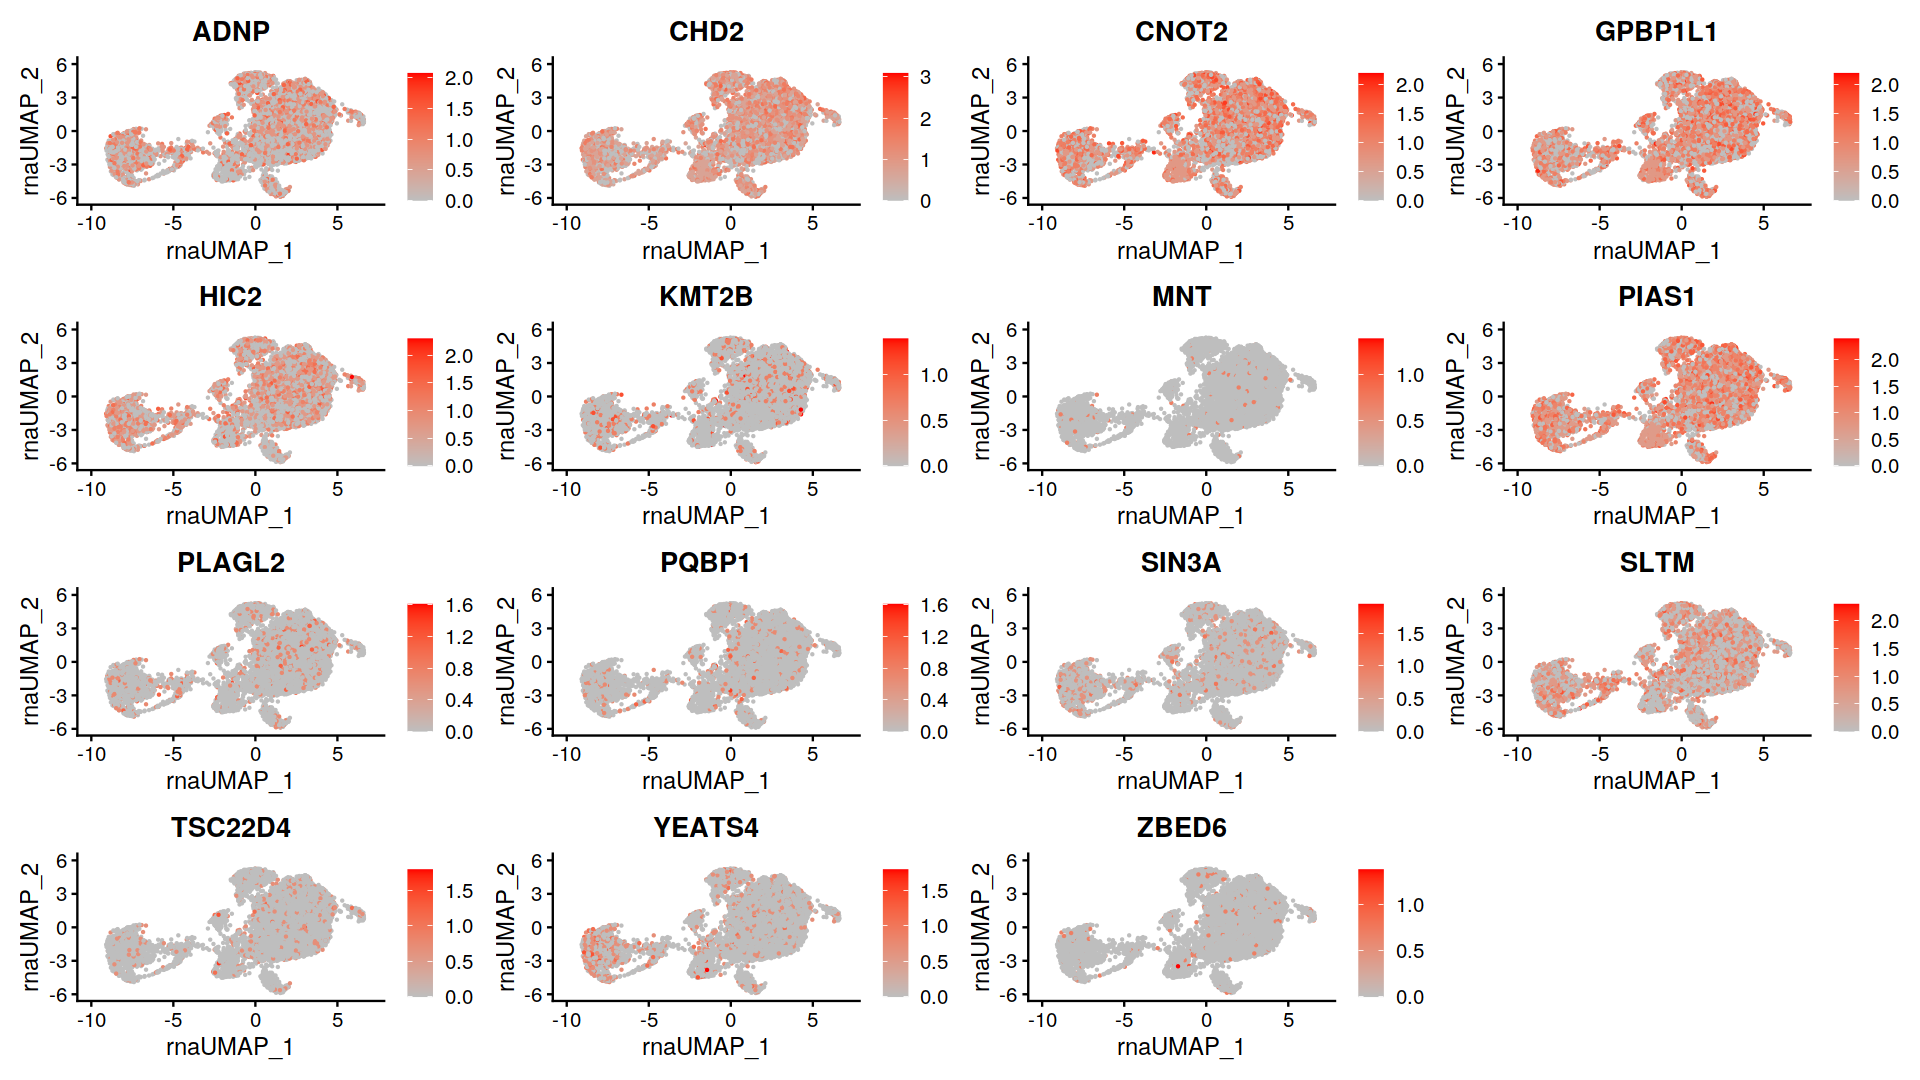

In [69]:
options(repr.plot.width = 16, repr.plot.height = 9)
FeaturePlot(
    seurat,
    features = gene_targets,
    reduction = 'umap.rna',
    cols = c("grey", "red")
) 

# Visualize

In [70]:
df_thresholds_dummy = df_thresholds
select_inf = df_thresholds_dummy$threshold == Inf
df_thresholds_dummy[select_inf, 'threshold'] = NA


In [71]:
head(df_thresholds_dummy)
head(d)

threshold guide_name
1 149       ADNP-1    
2 109       ADNP-2    
3 206       CHD2-1    
4 154       CHD2-2    
5  96       CNOT2-1   
6 220       GPBP1L1-1

guide_name num_guides_in_cell
28 ADNP_1      82               
30 ADNP_1     122               
46 ADNP_1      34               
53 ADNP_1      18               
59 ADNP_1     258               
64 ADNP_1     127

No id variables; using all as measure variables



Warning message:
“Removed 1 rows containing missing values (`geom_vline()`).”


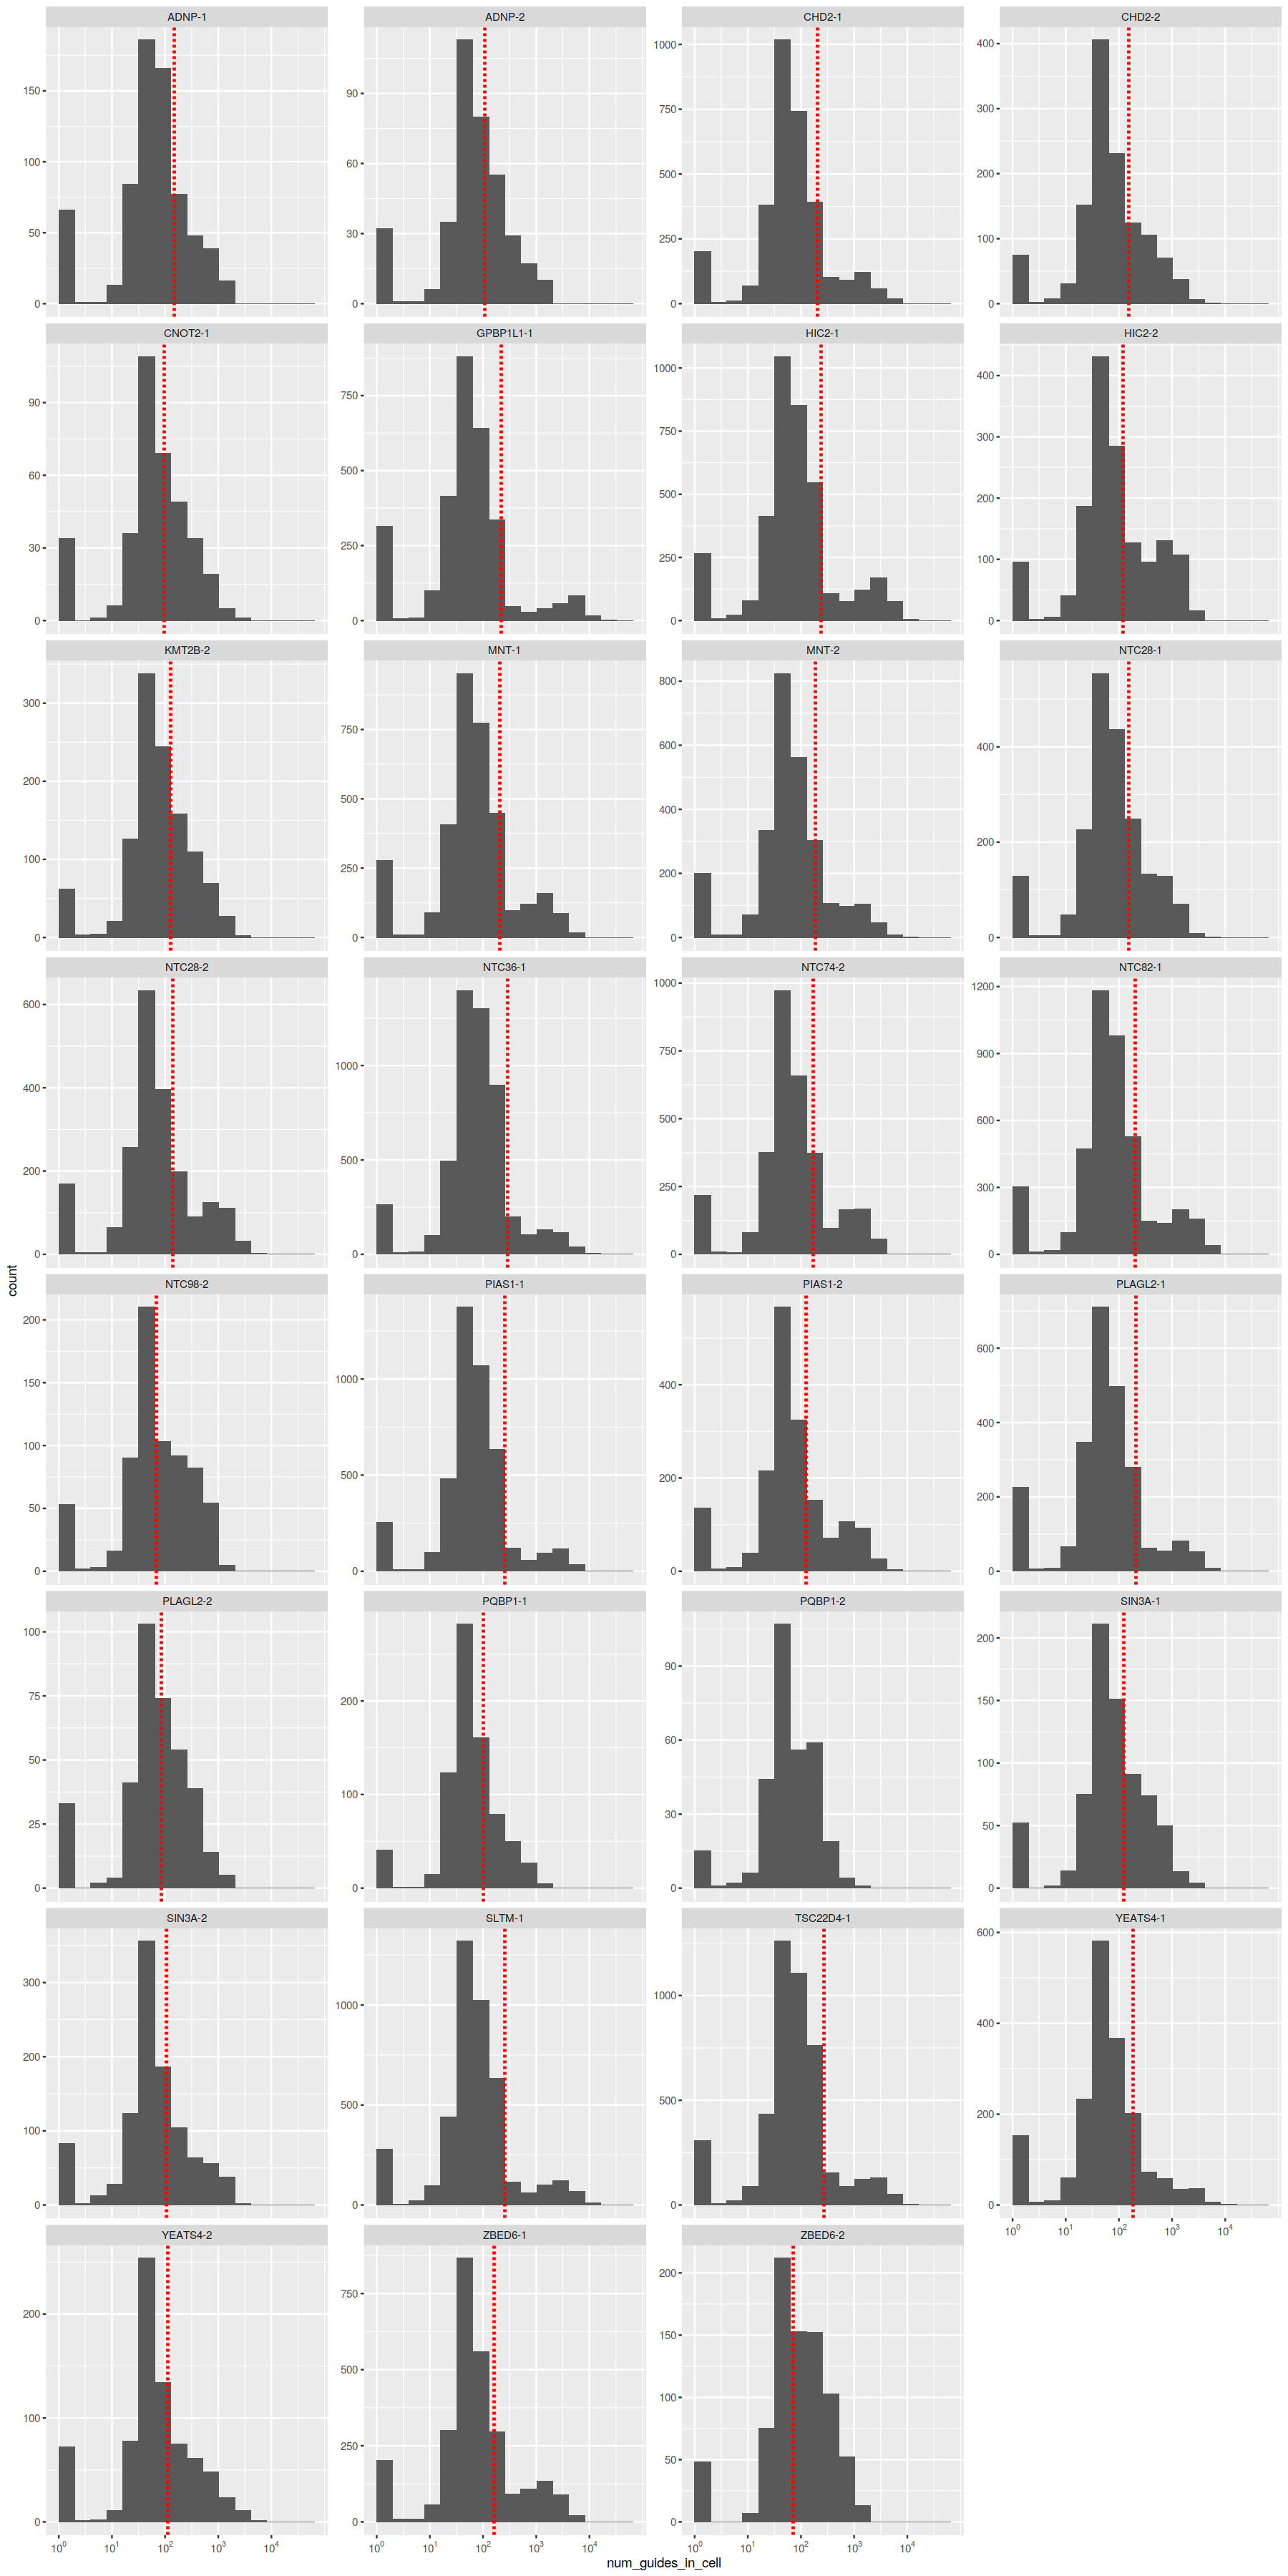

In [72]:
library(reshape2)
library(scales)
df_guide_counts_by_cell <- as.data.frame(t(as.data.frame(seurat$guidecapture@counts)))

d <- melt(df_guide_counts_by_cell)
d <- d[d$value > 0,]
colnames(d) = c("guide_name", "num_guides_in_cell")

bin_breaks <- c(1,2,2*2^(1:15))
options(repr.plot.width = 15, repr.plot.height = 30)
ggplot(d, aes(x = num_guides_in_cell)) + 
    geom_histogram(breaks = bin_breaks) +
    labs(y_label="count") +
    scale_x_log10(labels=trans_format('log10',math_format(10^.x)), breaks=c(1,10,100,1000,10000)) +
    facet_wrap(~guide_name, scales = "free_y", ncol =  4)  + 
    geom_vline(data = df_thresholds_dummy, aes(xintercept = threshold), color="red", linetype="dashed", linewidth=1)



In [73]:
df_thresholds_dummy

threshold guide_name
1  149       ADNP-1    
2  109       ADNP-2    
3  206       CHD2-1    
4  154       CHD2-2    
5   96       CNOT2-1   
6  220       GPBP1L1-1 
7  237       HIC2-1    
8  119       HIC2-2    
9  126       KMT2B-2   
10 205       MNT-1     
11 185       MNT-2     
12 152       NTC28-1   
13 140       NTC28-2   
14 287       NTC36-1   
15 169       NTC74-2   
16 200       NTC82-1   
17  68       NTC98-2   
18 258       PIAS1-1   
19 126       PIAS1-2   
20 206       PLAGL2-1  
21  85       PLAGL2-2  
22 100       PQBP1-1   
23  NA       PQBP1-2   
24 124       SIN3A-1   
25 105       SIN3A-2   
26 256       SLTM-1    
27 272       TSC22D4-1 
28 184       YEATS4-1  
29 114       YEATS4-2  
30 163       ZBED6-1   
31  71       ZBED6-2

# Singlet/doublet assignment

In [74]:
select_zeros = rowSums(df_calls) == 0
select_ones  = rowSums(df_calls) == 1
select_twos  = rowSums(df_calls) == 2
classes = rep('doublet', nrow(df_calls))
names(classes) = rownames(df_calls)
classes[select_zeros] = "no_call"
classes[select_ones]  = "singlet"

In [75]:
colnames(df_protosp) <- c("Gene", "GuideName", "PS")

If two guides are the same vector, assign 'singlet' status to cell

In [76]:
dual_call_cells = rownames(df_calls[select_twos, ])
guide_names = colnames(df_calls)

for(cell in dual_call_cells) {
    select_called = df_calls[cell, ]
    calls = as.vector(t(df_calls[cell, guide_names]))
    g1 = gsub("-", "_", guide_names[calls][1])
    g2 = gsub("-", "_", guide_names[calls][2])

    target1 = df_protosp[df_protosp$GuideName == g1,]$Gene    
    target2 = df_protosp[df_protosp$GuideName == g2,]$Gene    
    #print(paste(cell, target1, target2))

    if(target1 == target2) {        
        #print(paste(cell, target1, target2))
        classes[cell] = "singlet"
    }
}


### Normalize guide capture data

In [77]:
seurat

An object of class Seurat 
240747 features across 8507 samples within 4 assays 
Active assay: SCT (22035 features, 3000 variable features)
 3 other assays present: ATAC, RNA, guidecapture
 5 dimensional reductions calculated: lsi, umap.atac, wnn.umap, pca, umap.rna

In [78]:
DefaultAssay(seurat) <- "guidecapture"

# find cells with 0 counts and drop them
# Assuming your Seurat object is named 'seurat_obj'
count_matrix <- seurat[["guidecapture"]]@counts  # Replace "RNA" with the name of your current assay if different

# Find cells with 0 counts
zero_count_cells <- colnames(count_matrix)[colSums(count_matrix) == 0]

# Drop those cells from the Seurat object
seurat <- subset(seurat, cells = setdiff(colnames(seurat), zero_count_cells))

In [79]:
seurat

An object of class Seurat 
240747 features across 8499 samples within 4 assays 
Active assay: guidecapture (31 features, 0 variable features)
 3 other assays present: SCT, ATAC, RNA
 5 dimensional reductions calculated: lsi, umap.atac, wnn.umap, pca, umap.rna

In [80]:
DefaultAssay(seurat) <- "guidecapture"
npcs = 30

seurat <- SCTransform(seurat, assay = 'guidecapture', method = "glmGamPoi", vst.flavor = "v2", verbose = FALSE, new.assay.name = "crisprSCT")  %>% 
          RunPCA(verbose=FALSE, assay = 'crisprSCT', reduction.name = 'crisprPCA', npcs=npcs) %>% 
          RunUMAP(dims = 1:npcs, reduction.name = 'umap.guide', reduction.key = 'guideUMAP_', verbose=FALSE)

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames =

Update singlet/doublet status in seurat object

In [81]:
#seurat@meta.data[, guide_names] = NULL
#seurat@meta.data = merge(seurat@meta.data, df_calls, by = 0)

# Visualization

In [82]:
guide_names = sort(rownames(seurat[['crisprSCT']]@scale.data))
options(repr.plot.width = 20, repr.plot.height = 10)
#DoHeatmap(seurat, assay = 'crisprSCT', features = guide_names) + NoLegend()


In [83]:
nrow(seurat@meta.data)
nrow(df_calls)

[1] 8499

[1] 8507

In [84]:
df_calls_and_classes = df_calls
df_calls_and_classes$class = classes

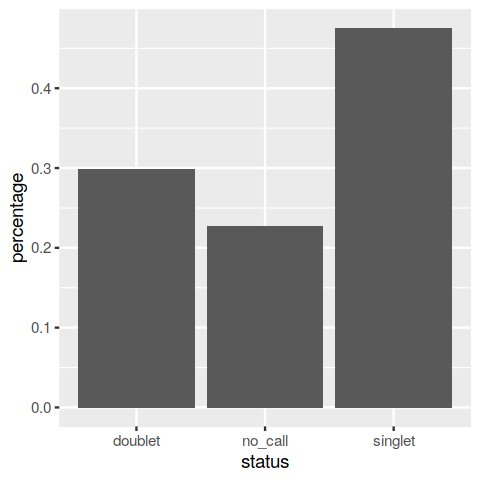

In [85]:
df_dummy = as.data.frame(table(df_calls_and_classes$class))
colnames(df_dummy) <- c("status", "count")
df_dummy$percentage = df_dummy$count/(sum(df_dummy$count))
options(repr.plot.width = 4, repr.plot.height = 4)
ggplot(df_dummy, aes(x = status, y = percentage)) +
    geom_bar(stat = "identity")

## Select the singlets, create a column with the assigned guides, also assign target name

In [86]:
select_singlets = df_calls_and_classes$class == 'singlet'
df_singlets = df_calls_and_classes[select_singlets,]

In [87]:
n_singlets = nrow(df_singlets)
n_doublets = nrow(df_calls_and_classes) - n_singlets
perc_singlet = n_singlets / (n_singlets + n_doublets)
cat(blue("#singlets", n_singlets, "\n"))
cat(blue("#doublets", n_doublets, "\n"))
cat(blue("%singlets", perc_singlet, "\n"))

#singlets 4044 
#doublets 4463 
%singlets 0.475373222052427 


In [88]:
# Singlets w/ one guide detected vs two guides
table(rowSums(df_singlets[,guide_names]))


   1    2 
2955 1089 

In [89]:
nrow(seurat@meta.data)

[1] 8499

### Find the target gene

In [90]:
singlet_cells = rownames(df_singlets)
guide_names = colnames(df_calls)
targets = vector()
detected = vector()
for(cell in singlet_cells) {
    target = ""
    detected_guides = 0
    select_called = df_singlets[cell, ]
    calls = as.vector(t(df_singlets[cell, guide_names]))
    g1 = guide_names[calls][1]
    g2 = guide_names[calls][2]

    if(!is.na(g1)) {
        g1 = gsub("-", "_", g1)
        target = df_protosp[df_protosp$GuideName == g1,]$Gene        
    } else if(!is.na(g2)) {
        g2 = gsub("-", "_", g2)
        target = df_protosp[df_protosp$GuideName == g2,]$Gene
    }
    targets = c(targets, target)
    detected = c(detected, sum(!is.na(c(g1, g2))))
    #print(target)
}
df_singlets$vector      = targets
df_singlets$target_gene = str_split_fixed(targets, "_", 2)[,1]
df_singlets$detected_guides_from_vector = detected

In [91]:
sample_n(df_singlets,3)

ADNP-1 ADNP-2 CHD2-1 CHD2-2 CNOT2-1 GPBP1L1-1 HIC2-1 HIC2-2
TGTGTTAAGTGCTGTG-1 FALSE  FALSE   TRUE   TRUE  FALSE   FALSE     FALSE  FALSE 
TGGTAAACATTAGGCC-1 FALSE  FALSE  FALSE  FALSE  FALSE   FALSE     FALSE  FALSE 
TTTGGTGCAGCATGGA-1 FALSE  FALSE  FALSE  FALSE  FALSE   FALSE     FALSE  FALSE 
                   KMT2B-2 MNT-1 ⋯ SLTM-1 TSC22D4-1 YEATS4-1 YEATS4-2 ZBED6-1
TGTGTTAAGTGCTGTG-1 FALSE   FALSE ⋯ FALSE  FALSE     FALSE    FALSE    FALSE  
TGGTAAACATTAGGCC-1 FALSE   FALSE ⋯ FALSE  FALSE     FALSE    FALSE    FALSE  
TTTGGTGCAGCATGGA-1 FALSE   FALSE ⋯ FALSE   TRUE     FALSE    FALSE    FALSE  
                   ZBED6-2 class   vector  target_gene
TGTGTTAAGTGCTGTG-1 FALSE   singlet CHD2    CHD2       
TGGTAAACATTAGGCC-1 FALSE   singlet PIAS1   PIAS1      
TTTGGTGCAGCATGGA-1 FALSE   singlet TSC22D4 TSC22D4    
                   detected_guides_from_vector
TGTGTTAAGTGCTGTG-1 2                          
TGGTAAACATTAGGCC-1 2                          
TTTGGTGCAGCATGGA-1 1

### Subset seurat object

In [92]:
seurat_singlets = subset(seurat, cells = singlet_cells)

In [93]:
Idents(seurat_singlets) = df_singlets$vector

In [94]:
npcs = 30
DefaultAssay(seurat) <- "RNA"
seurat_singlets <- SCTransform(seurat_singlets, method = "glmGamPoi", vst.flavor = "v2", verbose = FALSE, new.assay.name = "SCT", return.only.var.genes = FALSE)  %>% 
          RunPCA(verbose=FALSE) %>% 
          RunUMAP(dims = 1:npcs, reduction.name = 'umap.rna', reduction.key = 'rnaUMAP_', verbose=FALSE)

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames =

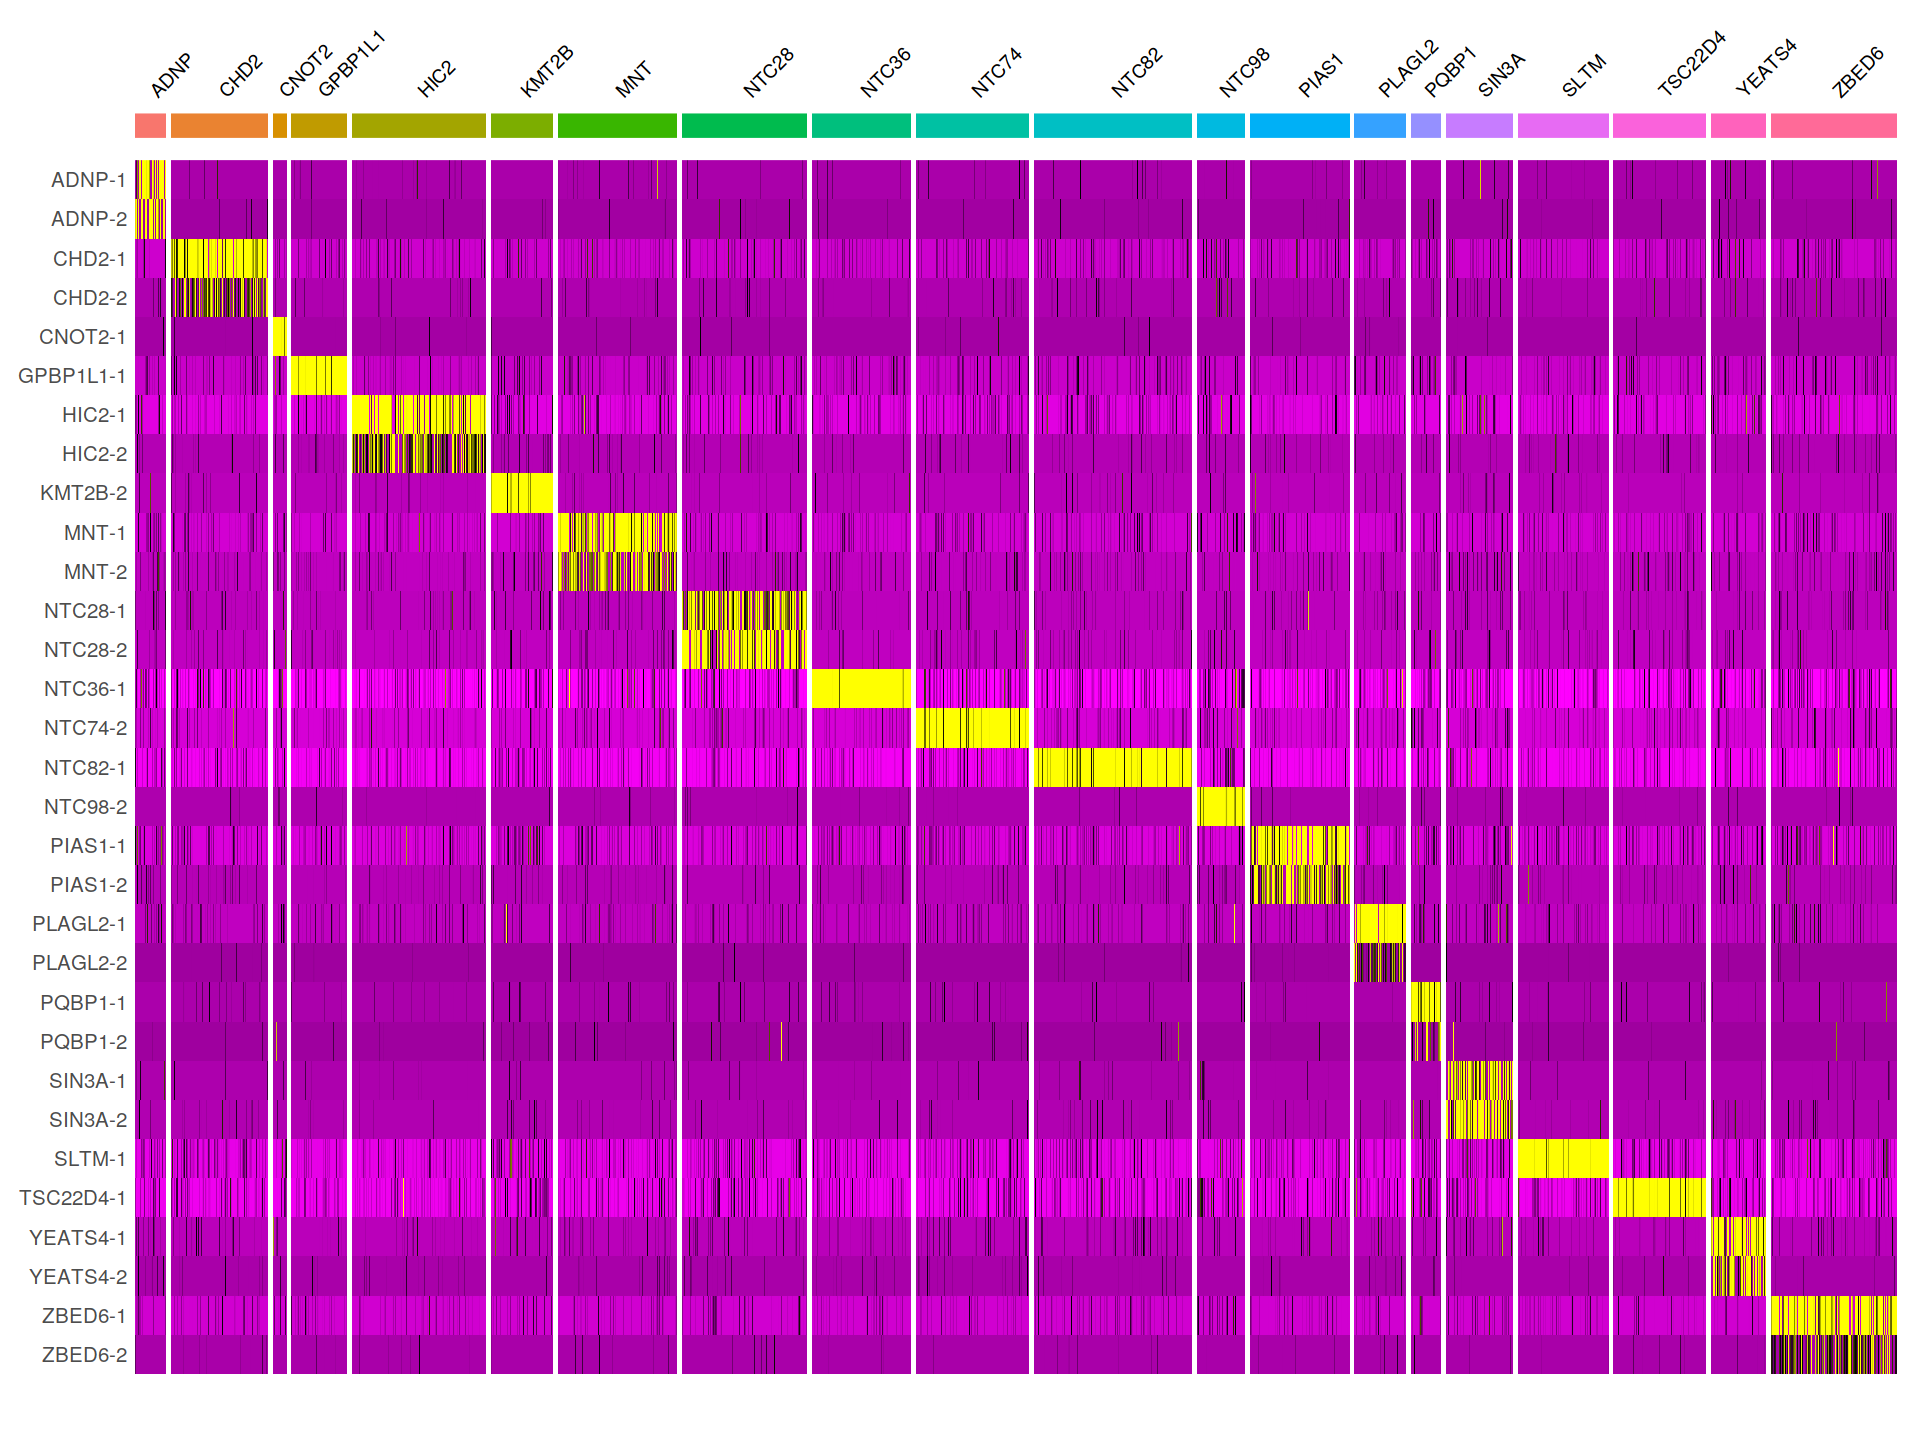

In [95]:
options(repr.plot.width = 16, repr.plot.height = 12)
guide_names = sort(unique(rownames(seurat_singlets[['crisprSCT']]@scale.data)))
levels(seurat_singlets) = sort(levels(seurat_singlets))
DoHeatmap(seurat_singlets, assay = "crisprSCT", features = guide_names, size = 4) + 
    theme(axis.text.y = element_text(size = 12)) + 
    NoLegend()

In [96]:
npcs = 30
DefaultAssay(seurat) <- "RNA"
seurat <- SCTransform(seurat, method = "glmGamPoi", vst.flavor = "v2", verbose = FALSE, new.assay.name = "SCT", return.only.var.genes = FALSE)  %>% 
          RunPCA(verbose=FALSE) %>% 
          RunUMAP(dims = 1:npcs, reduction.name = 'umap.rna', reduction.key = 'rnaUMAP_', verbose=FALSE)

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames =

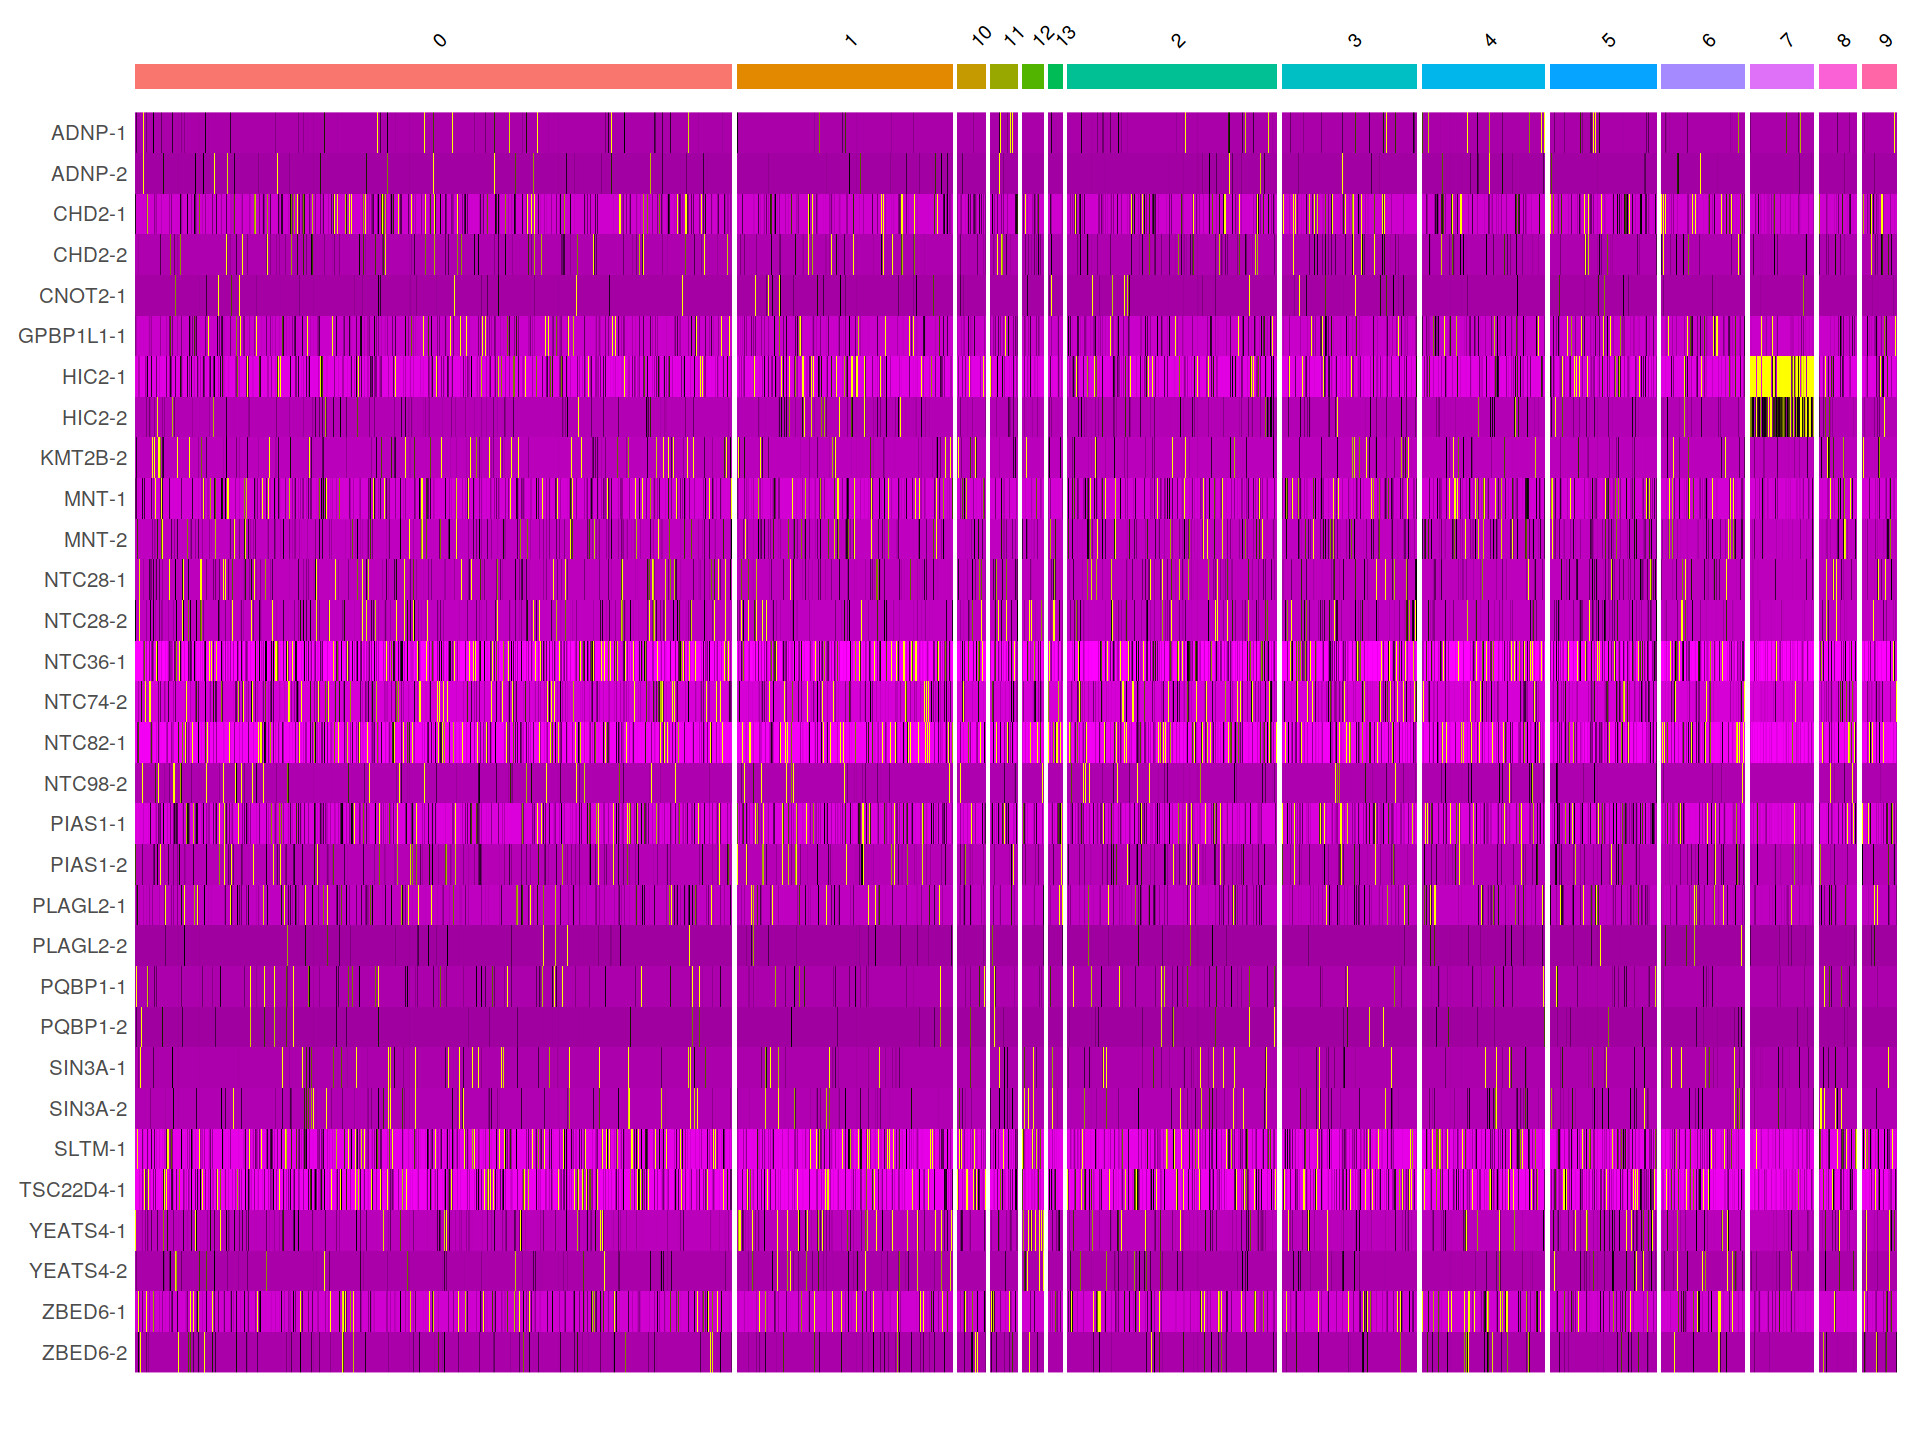

In [97]:
### Plot heatmap with all cells like with old guidecaller

options(repr.plot.width = 16, repr.plot.height = 12)
guide_names = sort(unique(rownames(seurat[['crisprSCT']]@scale.data)))
levels(seurat) = sort(levels(seurat))
DoHeatmap(seurat, assay = "crisprSCT", features = guide_names, size = 4) + 
    theme(axis.text.y = element_text(size = 12)) + 
    NoLegend()

Warning message in DoHeatmap(seurat_singlets, assay = "SCT", features = sort(gene_names), :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: NTC98, NTC82, NTC74, NTC36, NTC28”


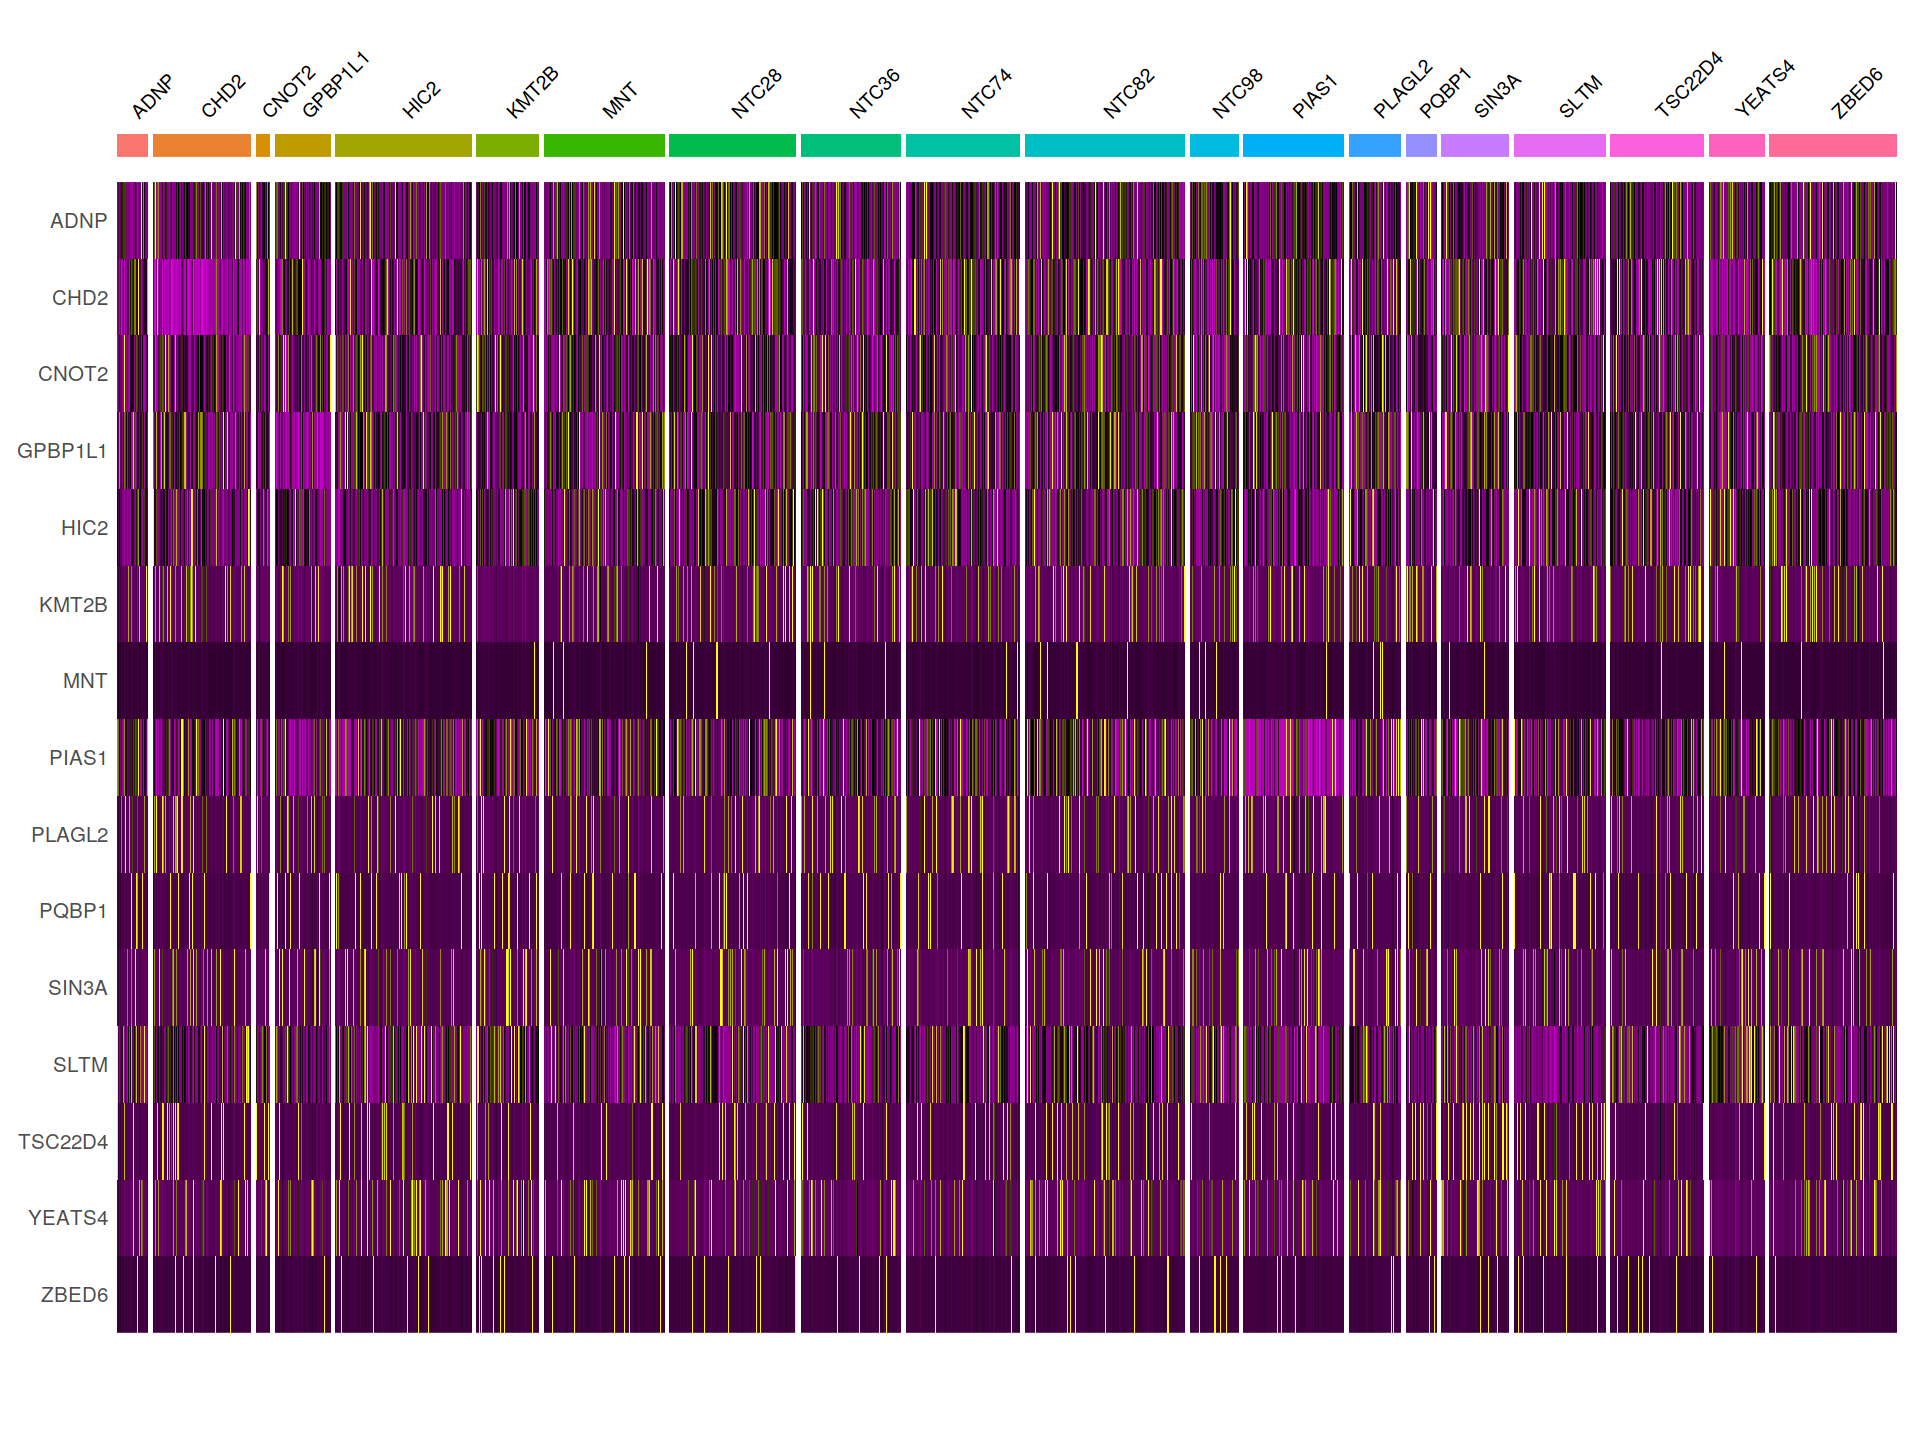

In [98]:
options(repr.plot.width = 16, repr.plot.height = 12)
gene_names = unique(df_singlets$target_gene)

DefaultAssay(seurat_singlets) = "SCT"
Idents(seurat_singlets) = df_singlets$vector
levels(seurat_singlets) = sort(levels(seurat_singlets))
DoHeatmap(seurat_singlets, assay = "SCT", features = sort(gene_names), size = 4) + 
    theme(axis.text.y = element_text(size = 12)) + 
    NoLegend()

### Violin plots


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




$`1`

$`2`

attr(,"class")
[1] "list"      "ggarrange"

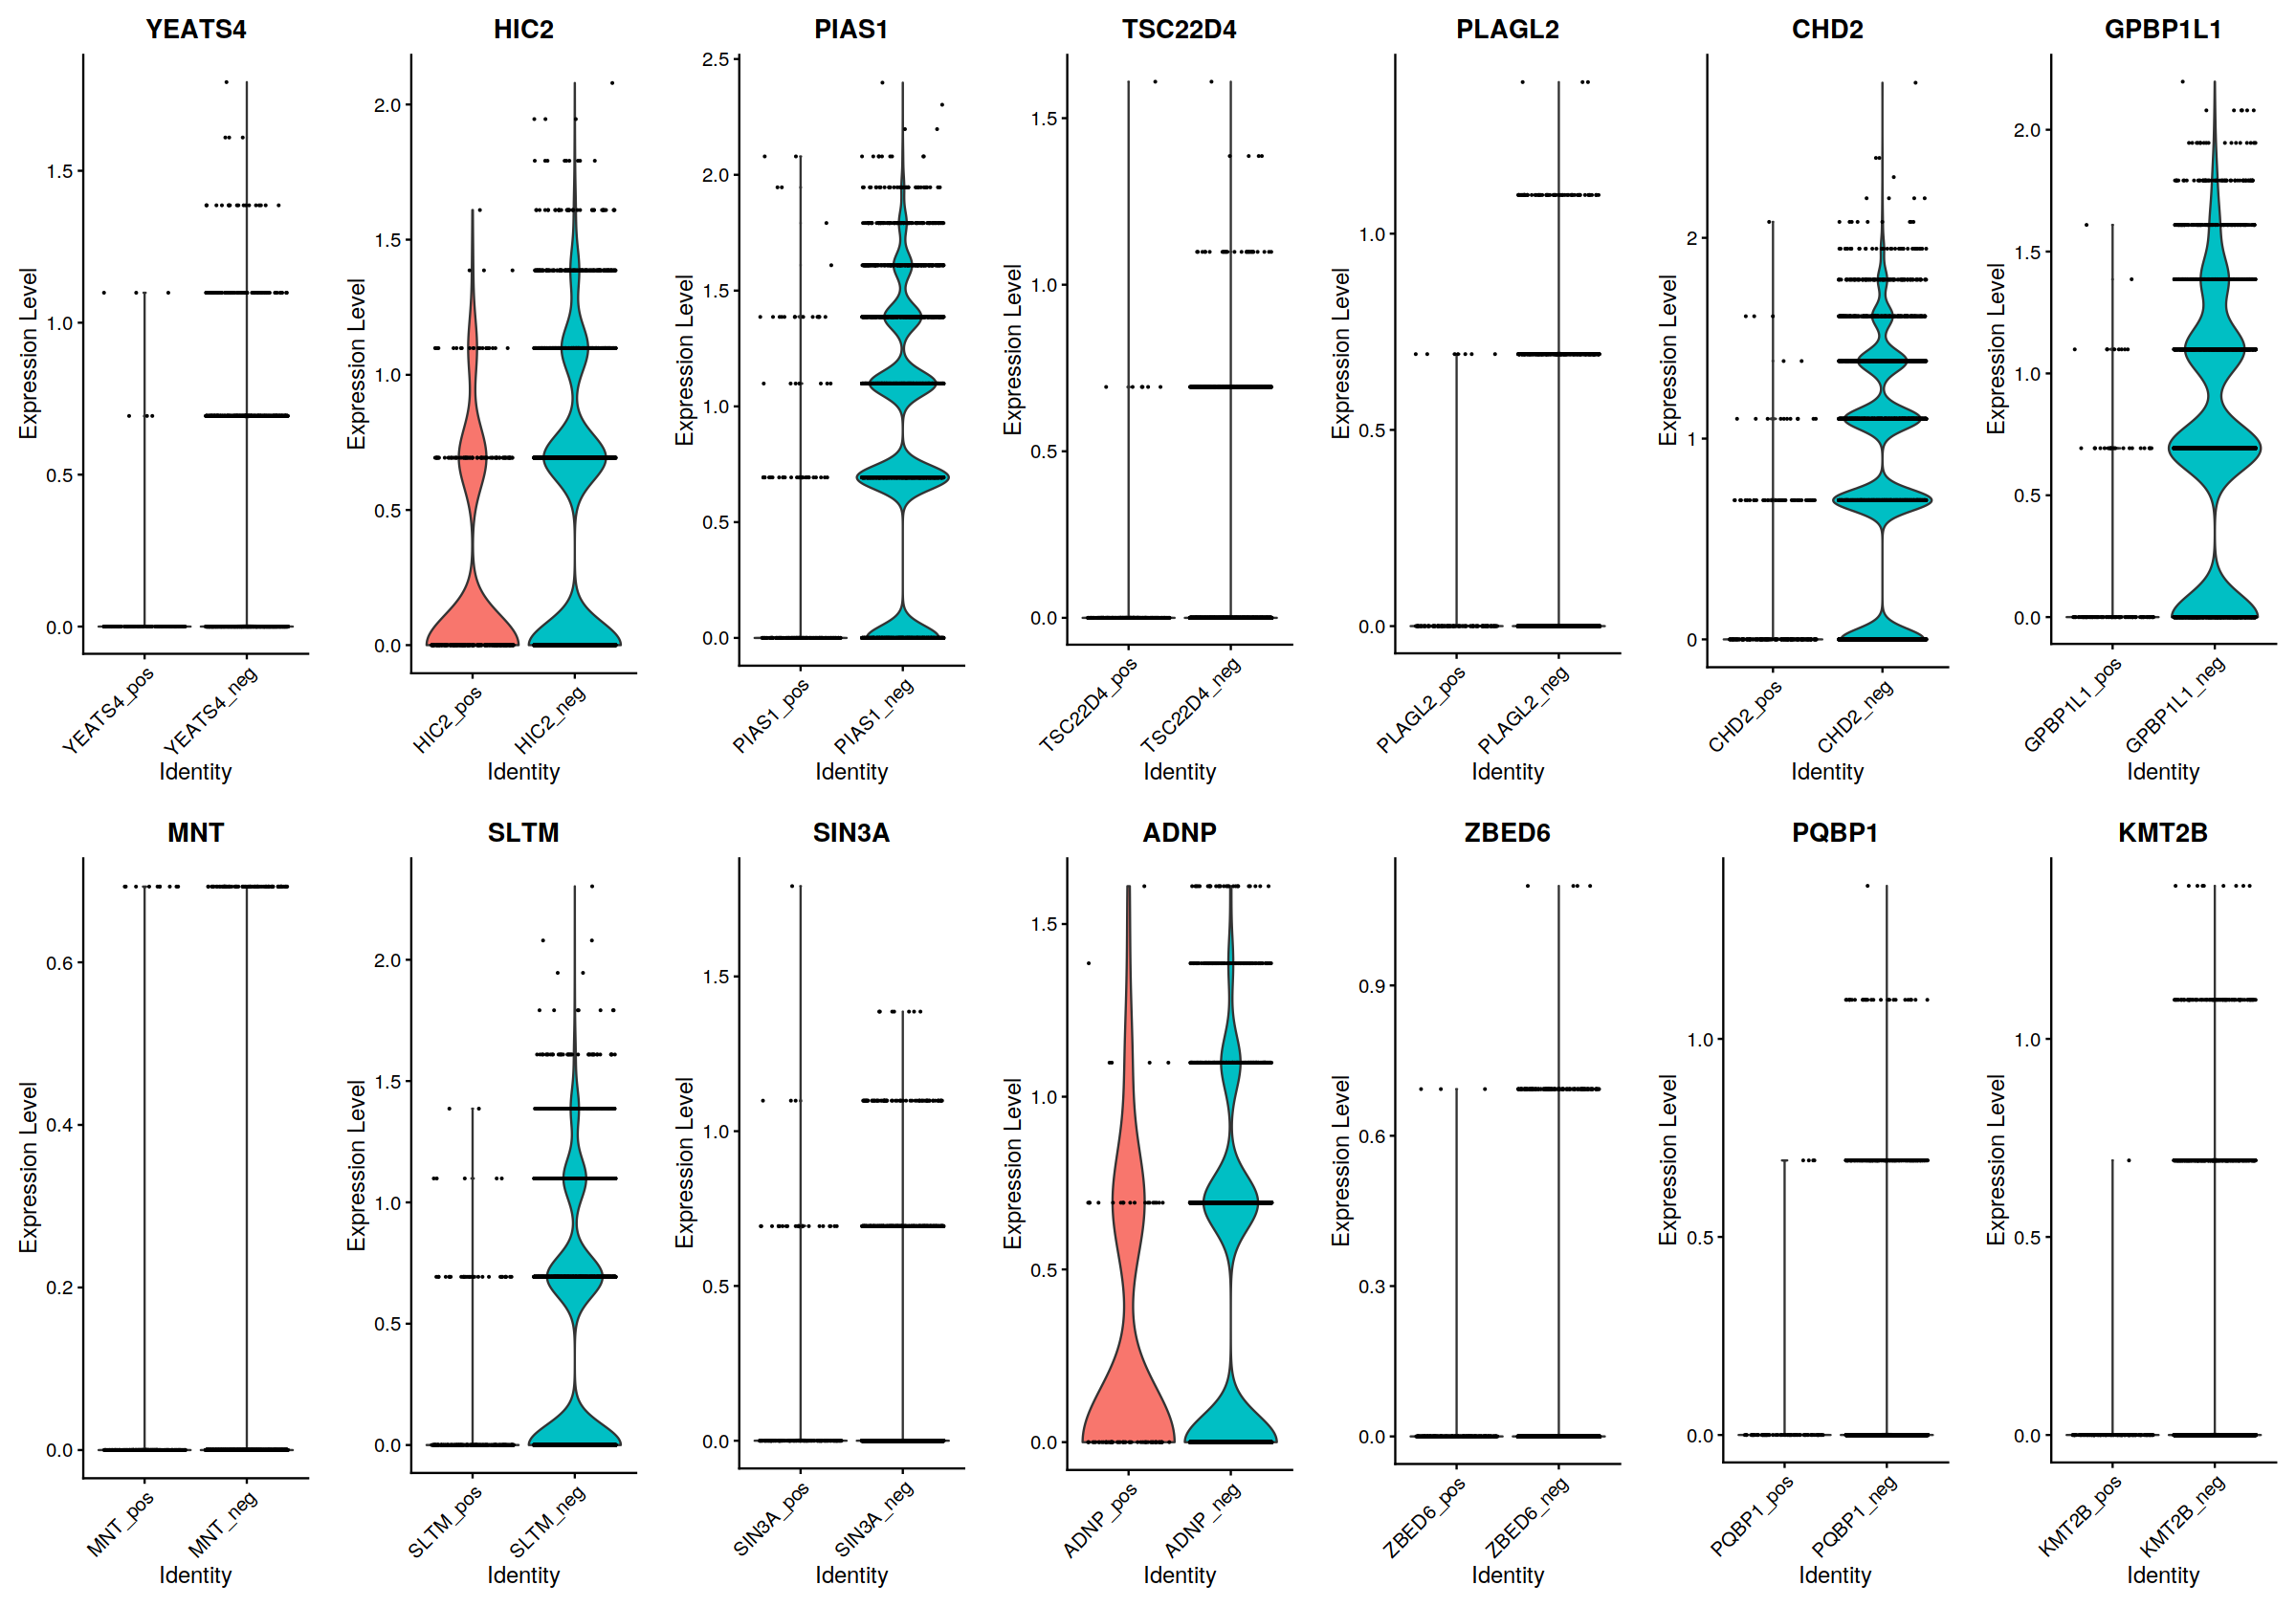

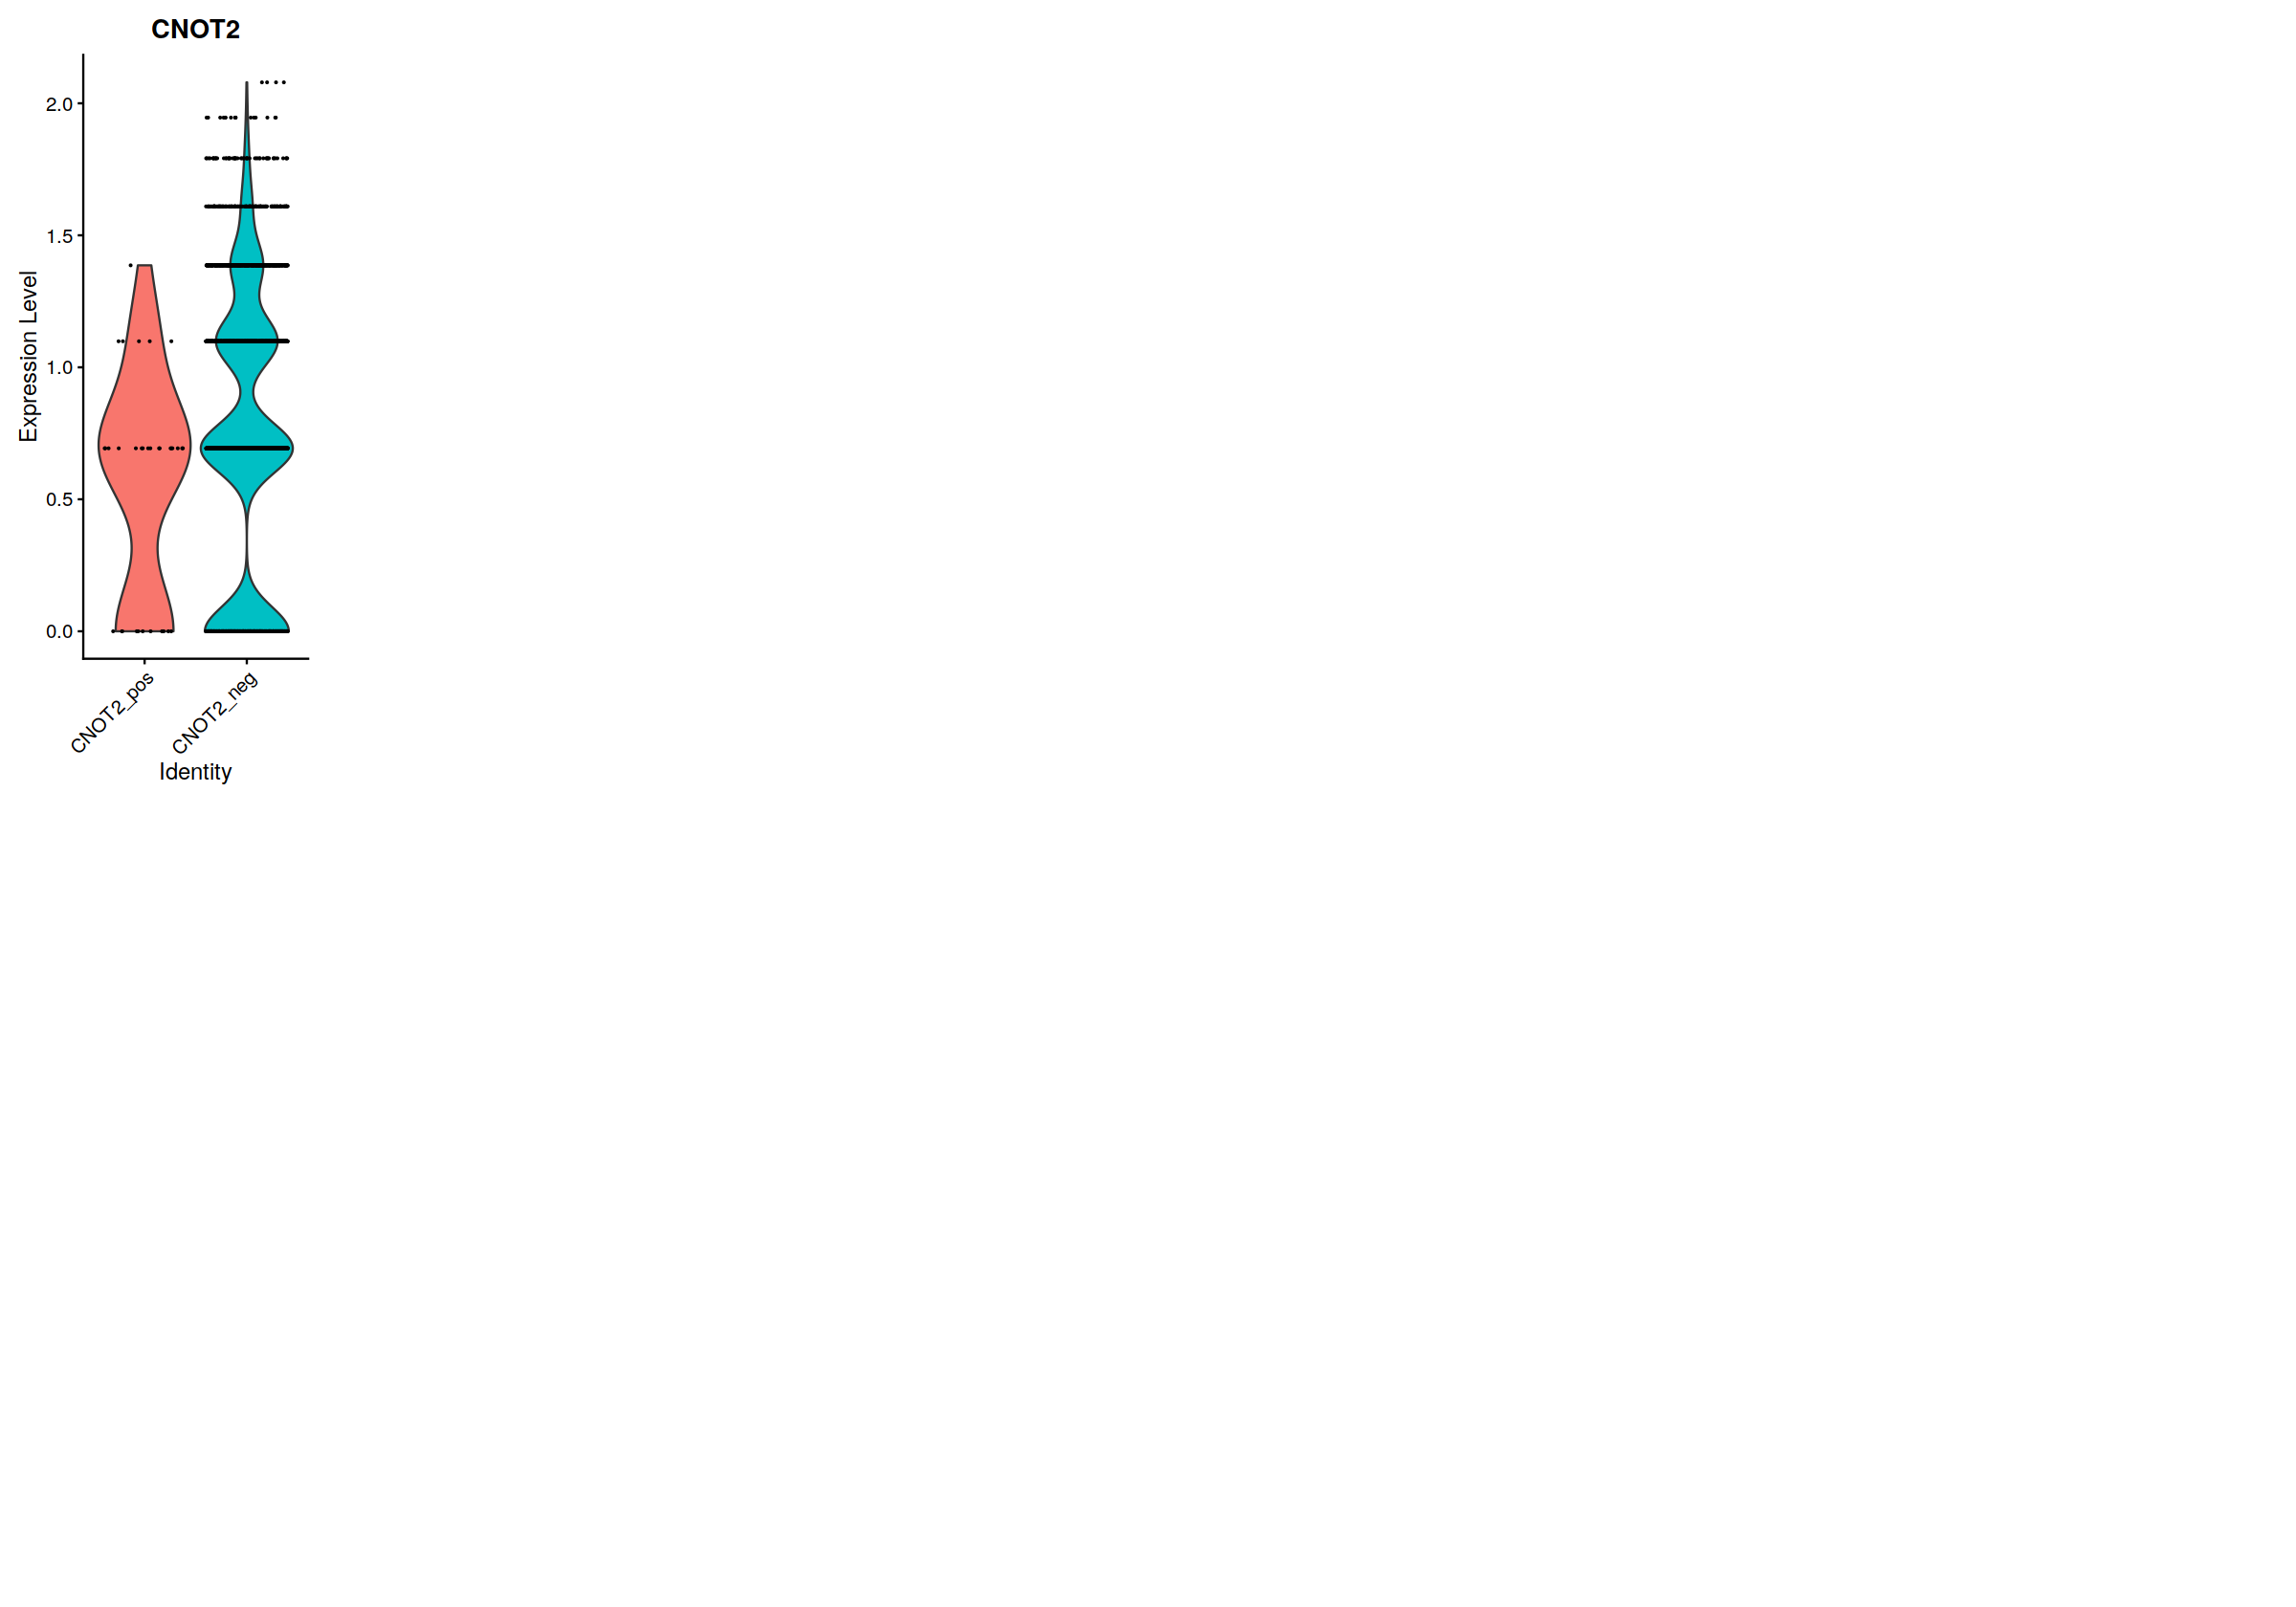

In [99]:
library(gridExtra)
library(patchwork)
library(ggpubr)
genes_in_assay = rownames(seurat_singlets[['SCT']]@scale.data)
plots = list()

for(i in 1:length(gene_names)){
    gene = gene_names[[i]]    
    if(("NTCTL" %in% gene) | !(gene %in% genes_in_assay)) {
        next
    }

    guides = paste0(gene, c('-1','-2', '-3','-4'))
    selected_cells = rownames(df_singlets[df_singlets$target_gene == gene, ])

    options(repr.plot.width = 4, repr.plot.height = 6)
    Idents(seurat_singlets) = paste0(gene, "_neg")
    Idents(seurat_singlets, cells = selected_cells) = paste0(gene, "_pos")
    plt = VlnPlot(seurat_singlets, assay="SCT", features = gene) + NoLegend()
    j = length(plots) + 1
    plots[[j]] = plt
}   

options(repr.plot.width=20, repr.plot.height=14)
ggarrange(plotlist=plots, ncol=7, nrow = 2)

# Plot clusters

YEATS4 
HIC2 


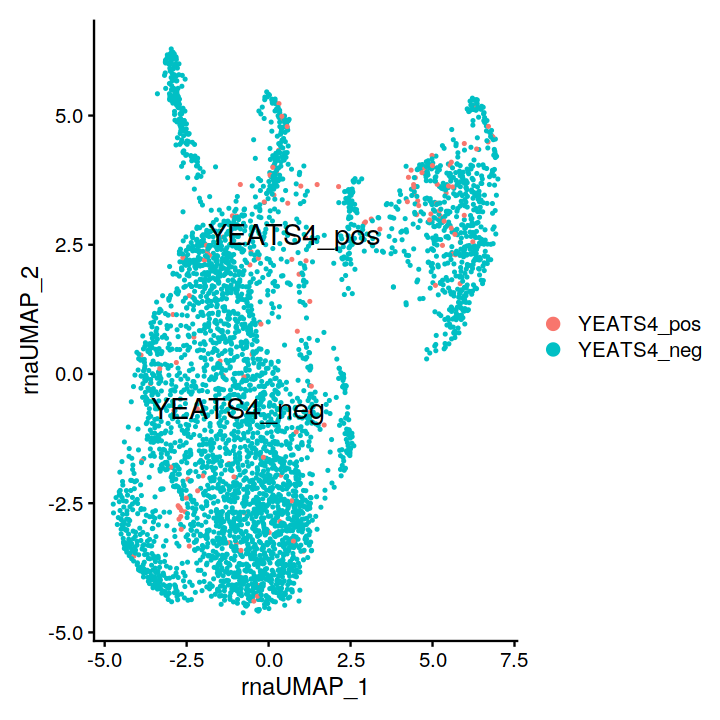

PIAS1 


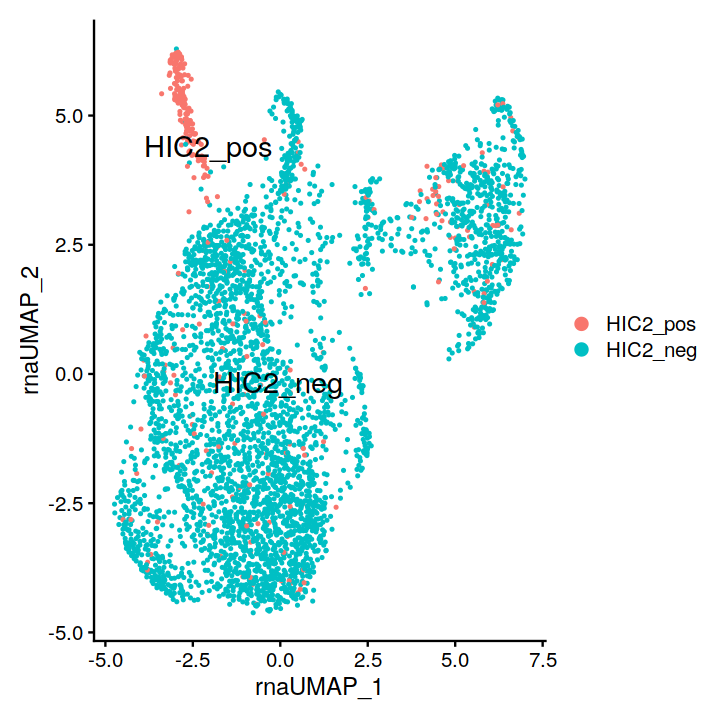

TSC22D4 


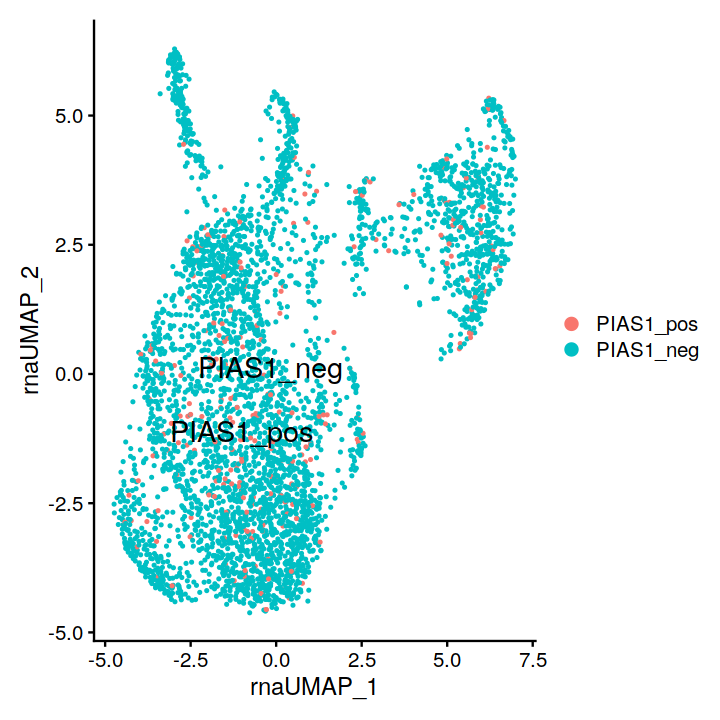

PLAGL2 


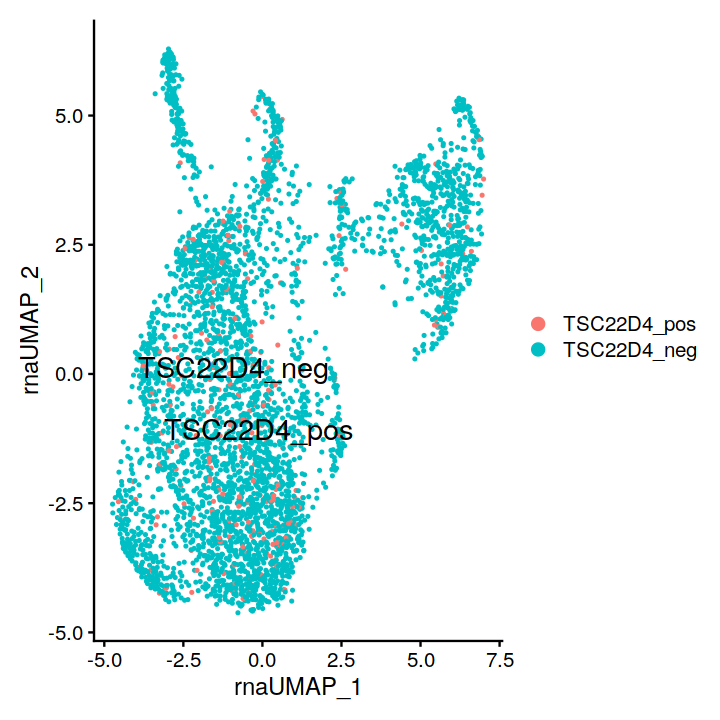

CHD2 


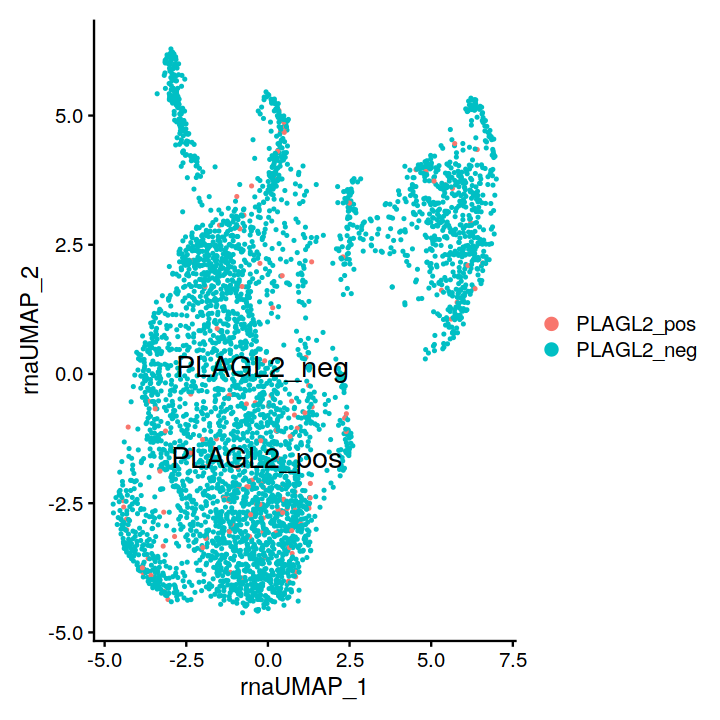

GPBP1L1 


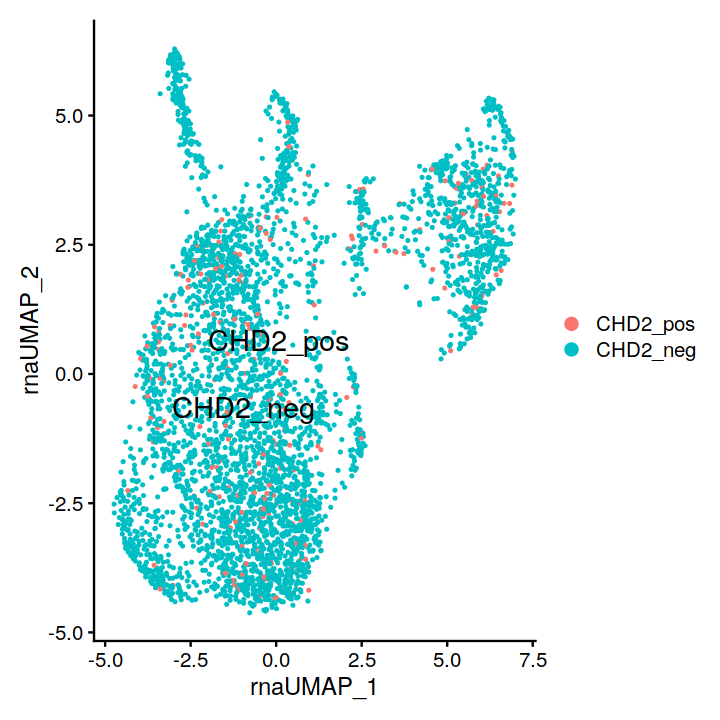

MNT 


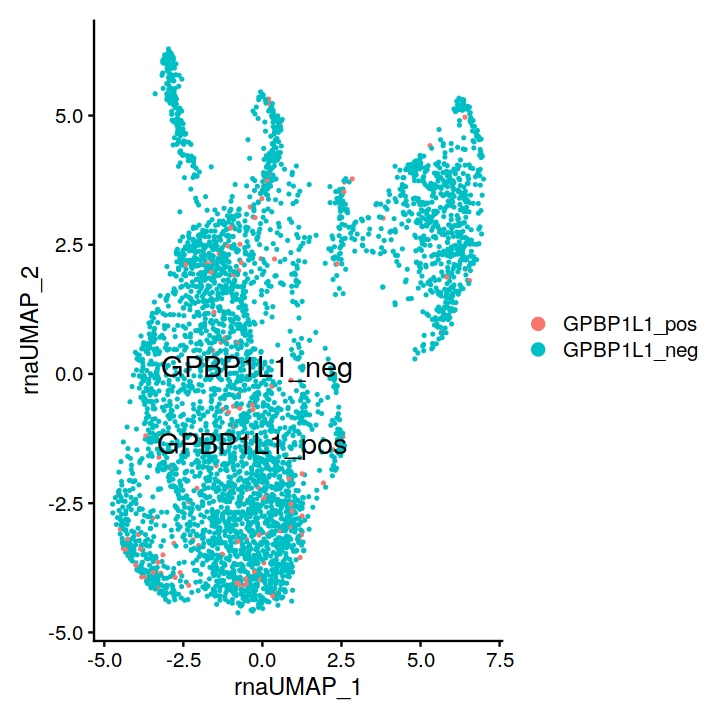

SLTM 


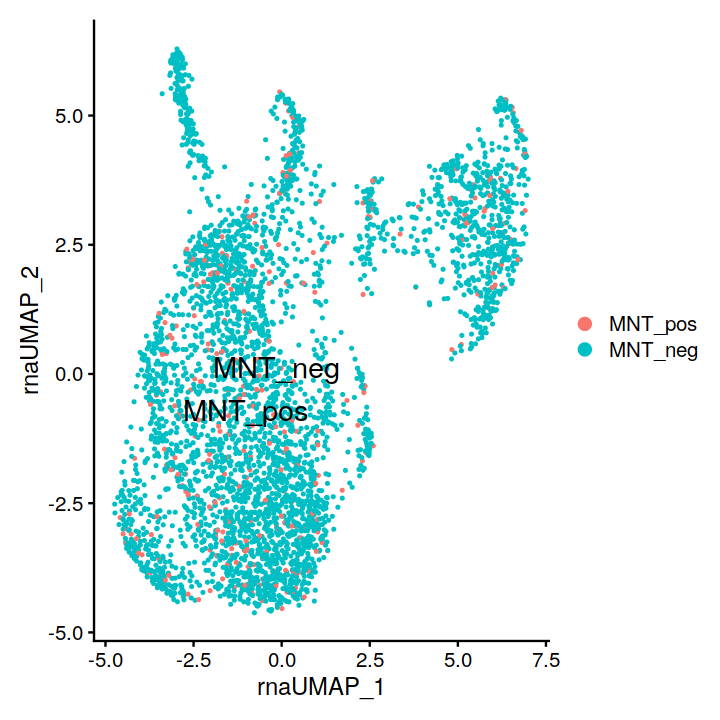

SIN3A 


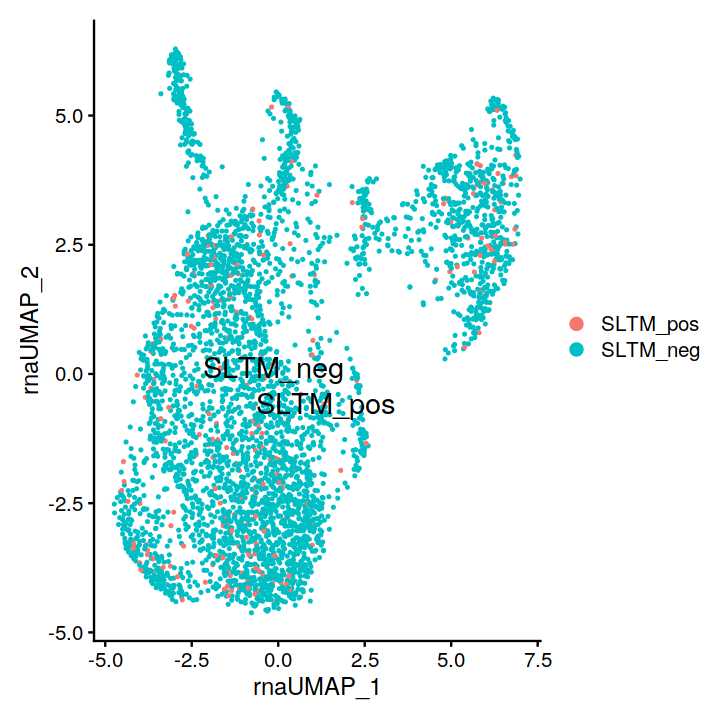

ADNP 


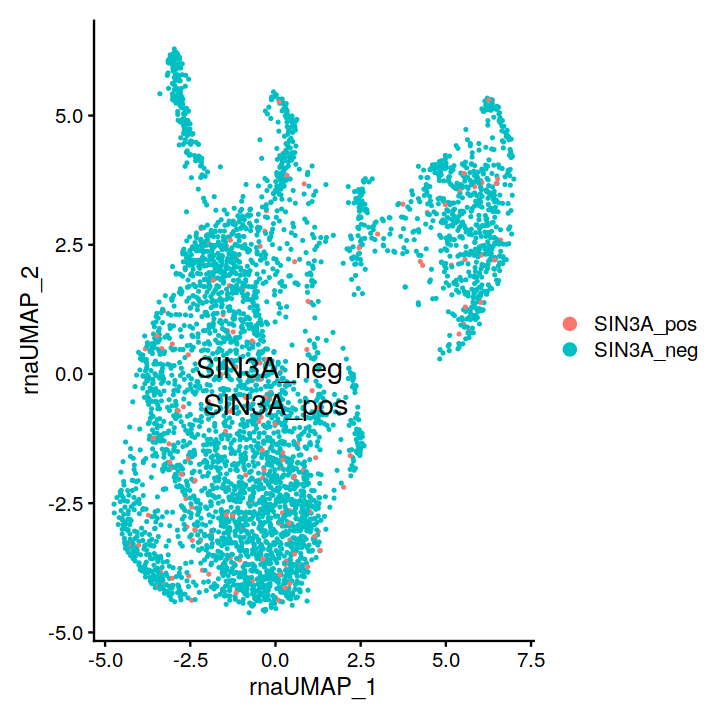

ZBED6 


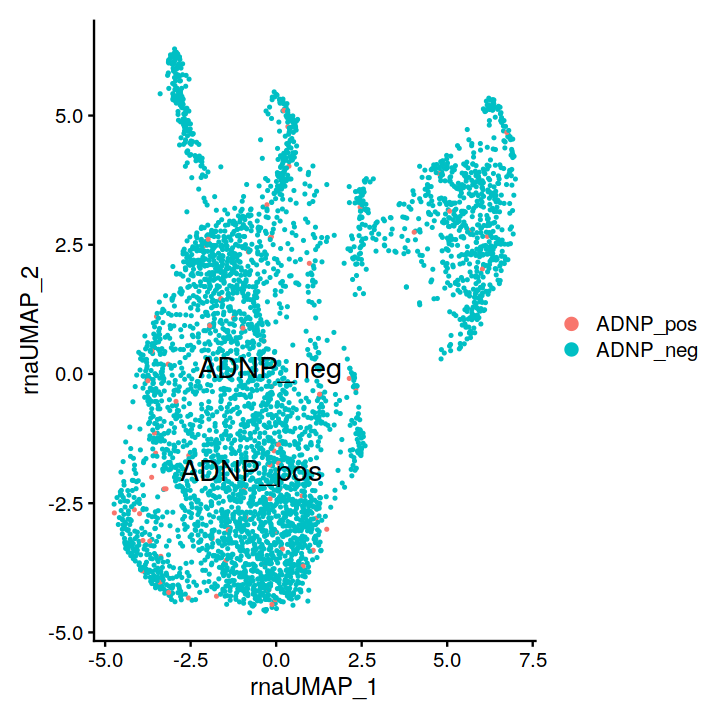

PQBP1 


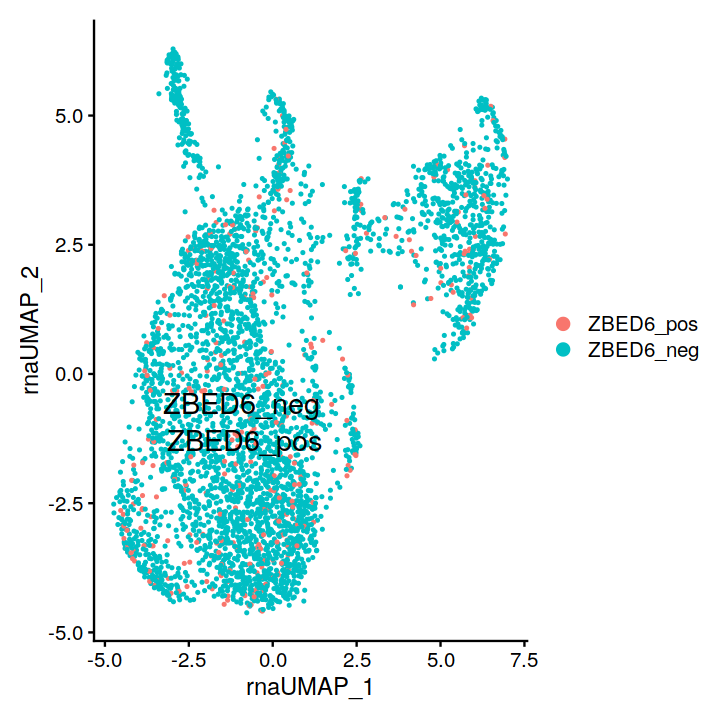

KMT2B 


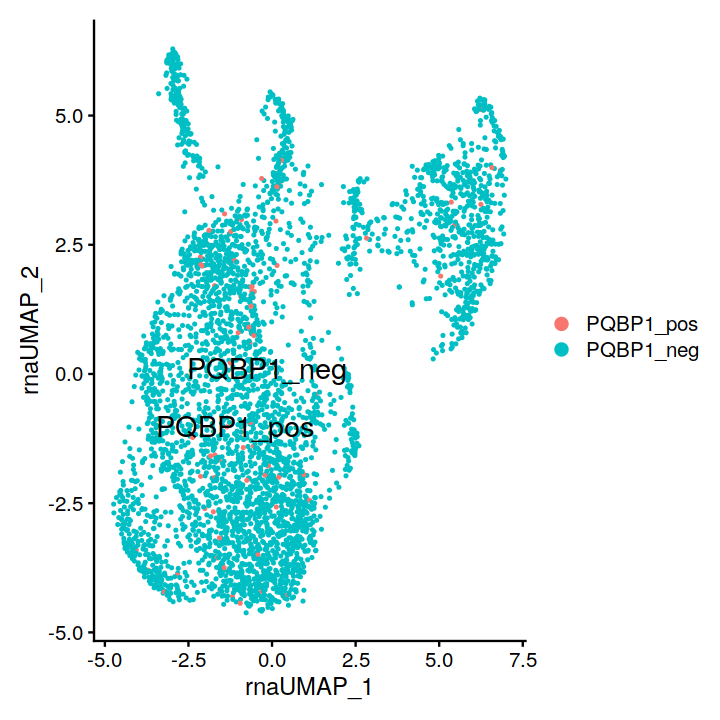

CNOT2 


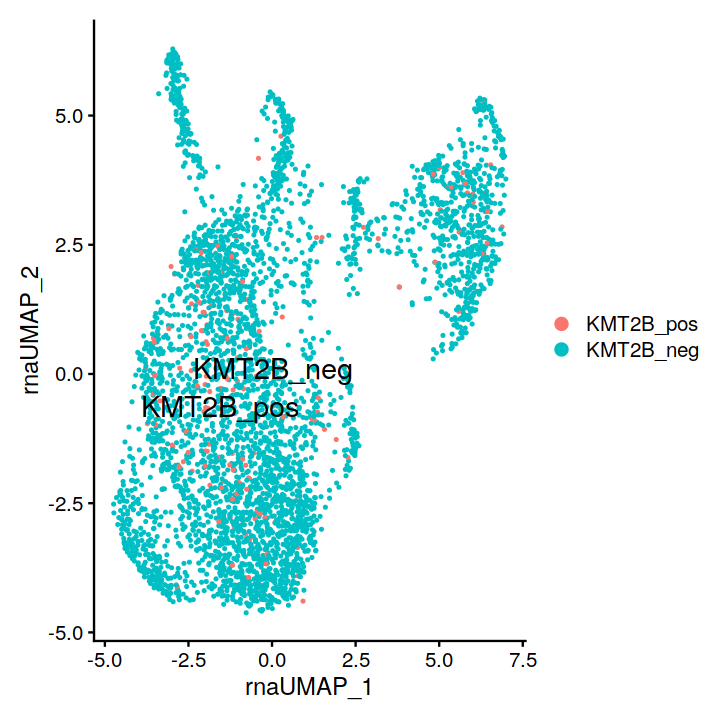

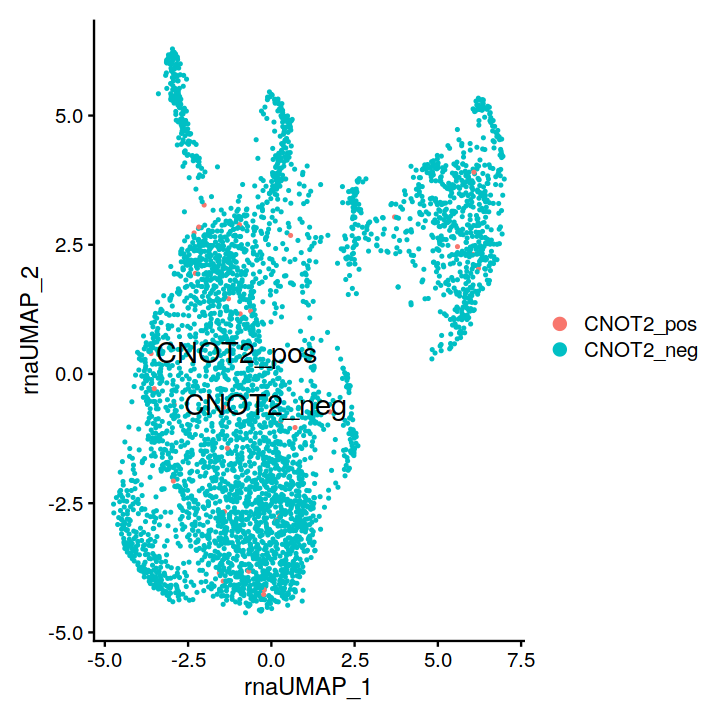

In [100]:
library(gridExtra)
library(patchwork)
library(ggpubr)
genes_in_assay = rownames(seurat_singlets[['SCT']]@scale.data)
plots = list()
options(repr.plot.width=5, repr.plot.height=5)

for(i in 1:length(gene_names)){
    gene = gene_names[[i]]    
    if(("NTCTL" %in% gene) | !(gene %in% genes_in_assay)) {
        next
    }
    cat(blue(gene), "\n")

    guides = paste0(gene, c('-1','-2', '-3','-4'))
    selected_cells = rownames(df_singlets[df_singlets$target_gene == gene, ])

    options(repr.plot.width = 6, repr.plot.height = 6)
    Idents(seurat_singlets) = paste0(gene, "_neg")
    Idents(seurat_singlets, cells = selected_cells) = paste0(gene, "_pos")
    plt = DimPlot(seurat_singlets, reduction = "umap.rna", label = TRUE, label.size = 6, repel = TRUE)
    j = length(plots) + 1
    plots[[j]] = plt
    print(plt)
}   


In [67]:
# save seurat obj # saveRDS(seurat_singlets, '{PATH_21}')

# Try to remake heatmap from HTODEMUX (HTOHeatmap)

In [151]:
# load callscalls <- readRDS('{PATH_18}')

In [5]:
library(pheatmap)

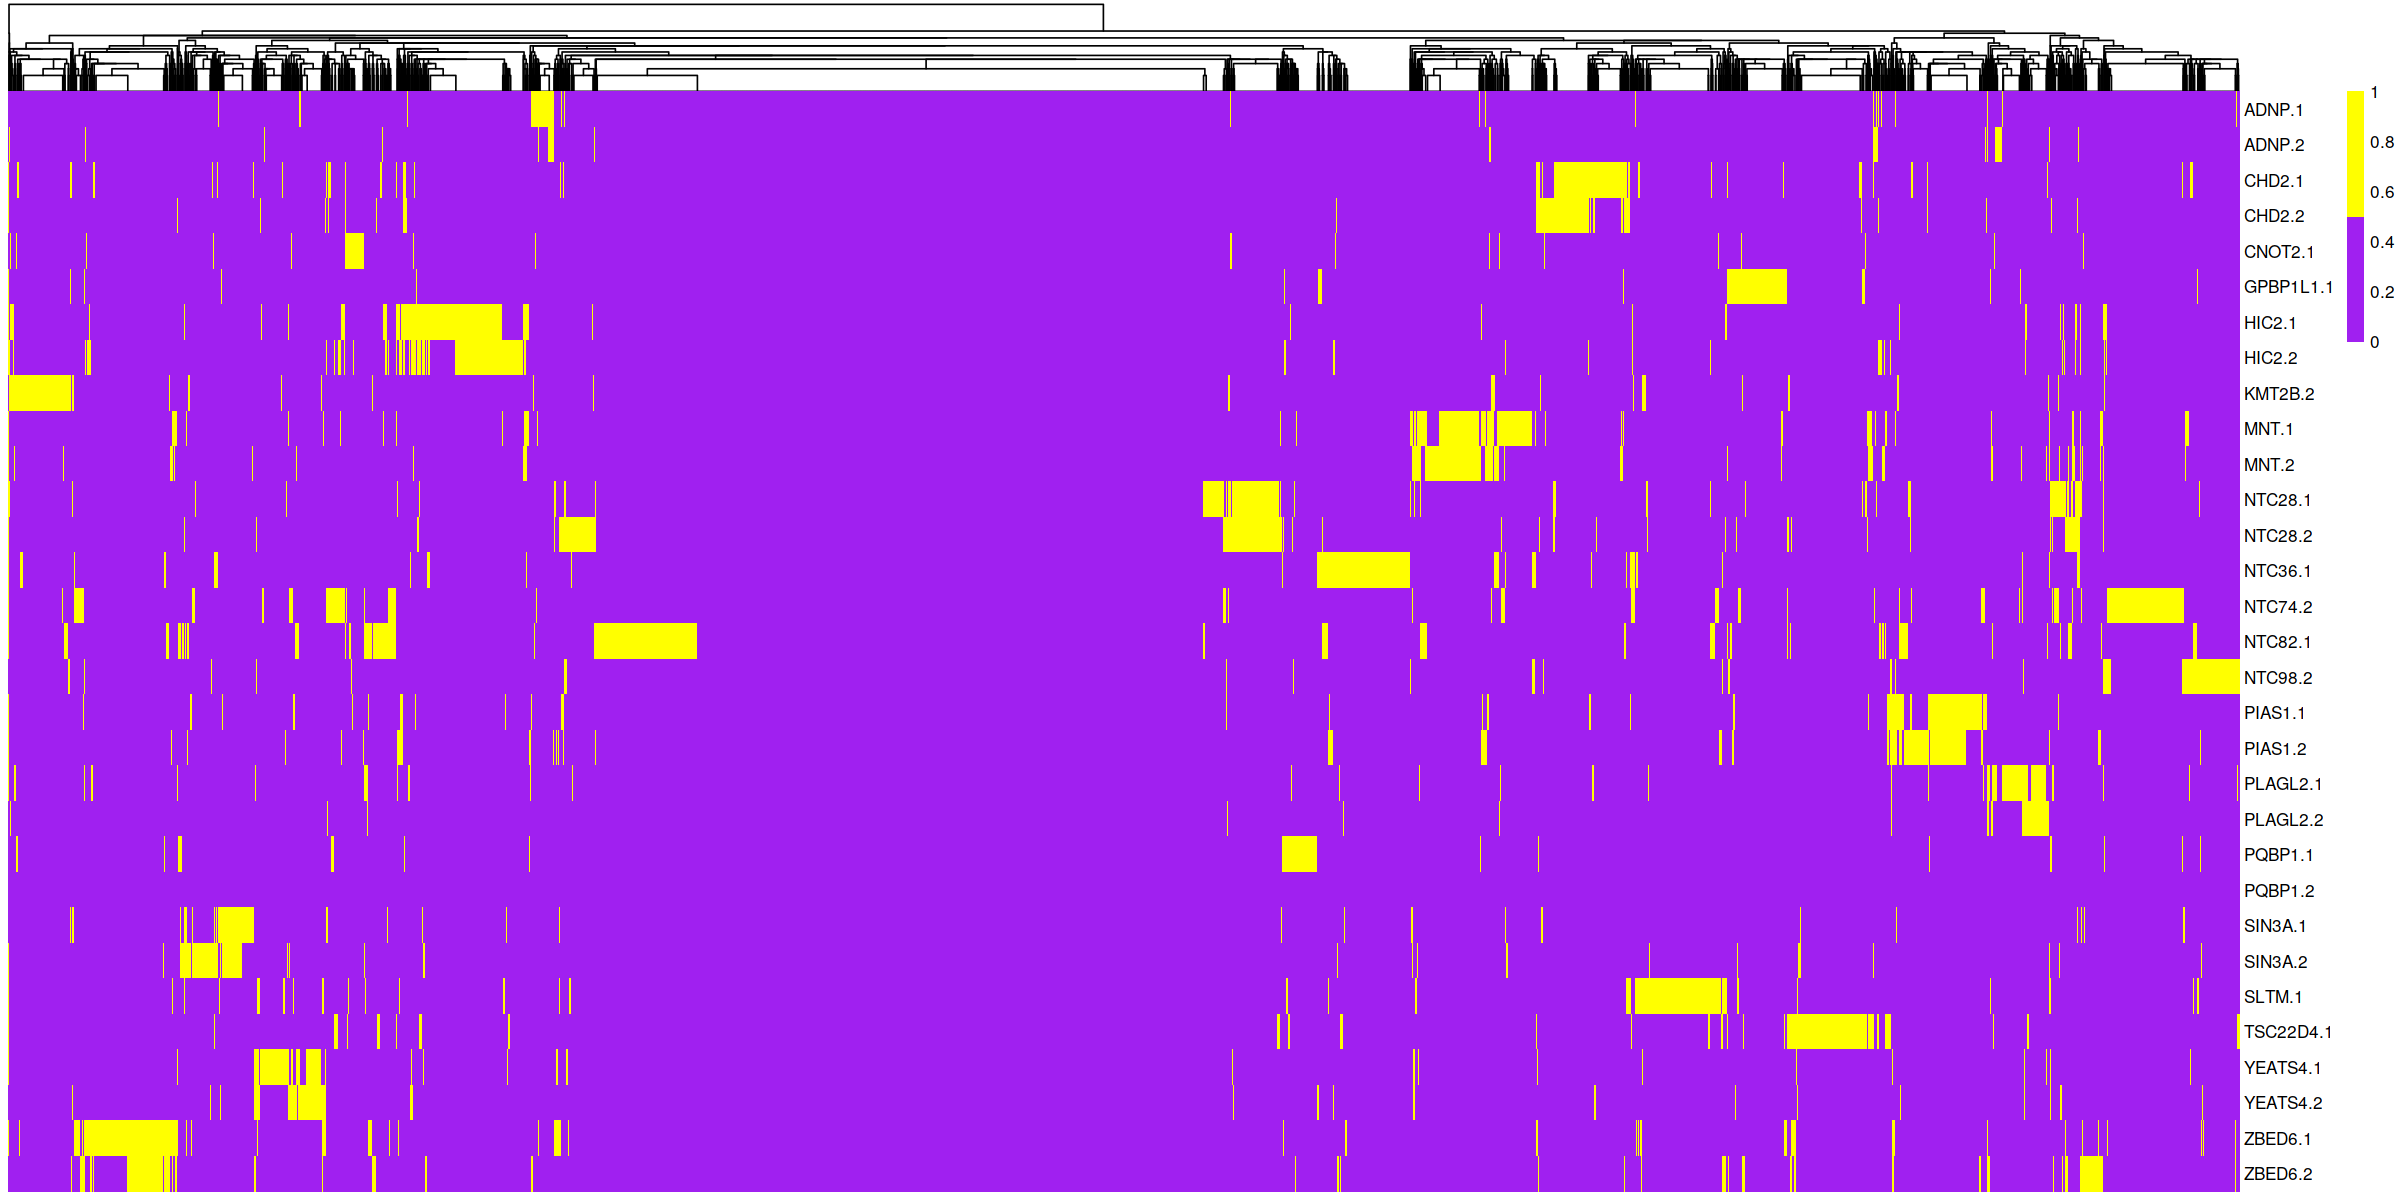

In [152]:
# Convert to numeric
calls_numeric <- as.data.frame(lapply(calls, as.numeric))

# Transpose the data
data_t <- t(calls_numeric)

# Create a color map
color_map <- colorRampPalette(c("purple", "yellow"))(2)

# Create the heatmap
pheatmap(data_t, color = color_map, show_rownames = TRUE, show_colnames = FALSE, scale = "none", cluster_cols=T, cluster_rows = F)

In [101]:
seurat

An object of class Seurat 
240770 features across 8499 samples within 5 assays 
Active assay: SCT (22027 features, 3000 variable features)
 4 other assays present: ATAC, RNA, guidecapture, crisprSCT
 7 dimensional reductions calculated: lsi, umap.atac, wnn.umap, pca, umap.rna, crisprPCA, umap.guide

In [106]:
colnames(seurat@meta.data)

[1] "nCount_ATAC"           "nFeature_ATAC"         "nCount_RNA"           
 [4] "nFeature_RNA"          "orig.ident"            "percent.mt"           
 [7] "nucleosome_signal"     "nucleosome_percentile" "TSS.enrichment"       
[10] "TSS.percentile"        "nCount_SCT"            "nFeature_SCT"         
[13] "predicted_doublets"    "doublet_scores"        "ATAC_snn_res.0.8"     
[16] "seurat_clusters"       "SCT.weight"            "ATAC.weight"          
[19] "wsnn_res.0.8"          "nCount_guidecapture"   "nFeature_guidecapture"
[22] "ADNP-1"                "ADNP-2"                "CHD2-1"               
[25] "CHD2-2"                "CNOT2-1"               "GPBP1L1-1"            
[28] "HIC2-1"                "HIC2-2"                "KMT2B-2"              
[31] "MNT-1"                 "MNT-2"                 "NTC28-1"              
[34] "NTC28-2"               "NTC36-1"               "NTC74-2"              
[37] "NTC82-1"               "NTC98-2"               "PIAS1-1"              
[40] "PIAS1-2"               "PLAGL2-1"              "PLAGL2-2"             
[43] "PQBP1-1"               "PQBP1-2"               "SIN3A-1"              
[46] "SIN3A-2"               "SLTM-1"                "TSC22D4-1"            
[49] "YEATS4-1"              "YEATS4-2"              "ZBED6-1"              
[52] "ZBED6-2"               "nCount_crisprSCT"      "nFeature_crisprSCT"

In [108]:
# subset for barcodes in sobj
df_calls_filt <- df_calls[rownames(df_calls) %in% Cells(seurat), 1:ncol(df_calls)]

# check if barcodes are in the same order
all(Cells(seurat) == rownames(df_calls_filt))

[1] TRUE

In [140]:
seurat$crisprSCT

SCTAssay data with 31 features for 8499 cells, and 1 SCTModel(s) 
Top 10 variable features:
 NTC36-1, NTC82-1, TSC22D4-1, SLTM-1, HIC2-1, NTC74-2, ZBED6-1,
GPBP1L1-1, PIAS1-1, MNT-1 

In [141]:
DefaultAssay(seurat) <- "crisprSCT"
matrix <- GetAssayData(object = seurat, slot = "counts")

In [142]:
matrix <- as.matrix(matrix)

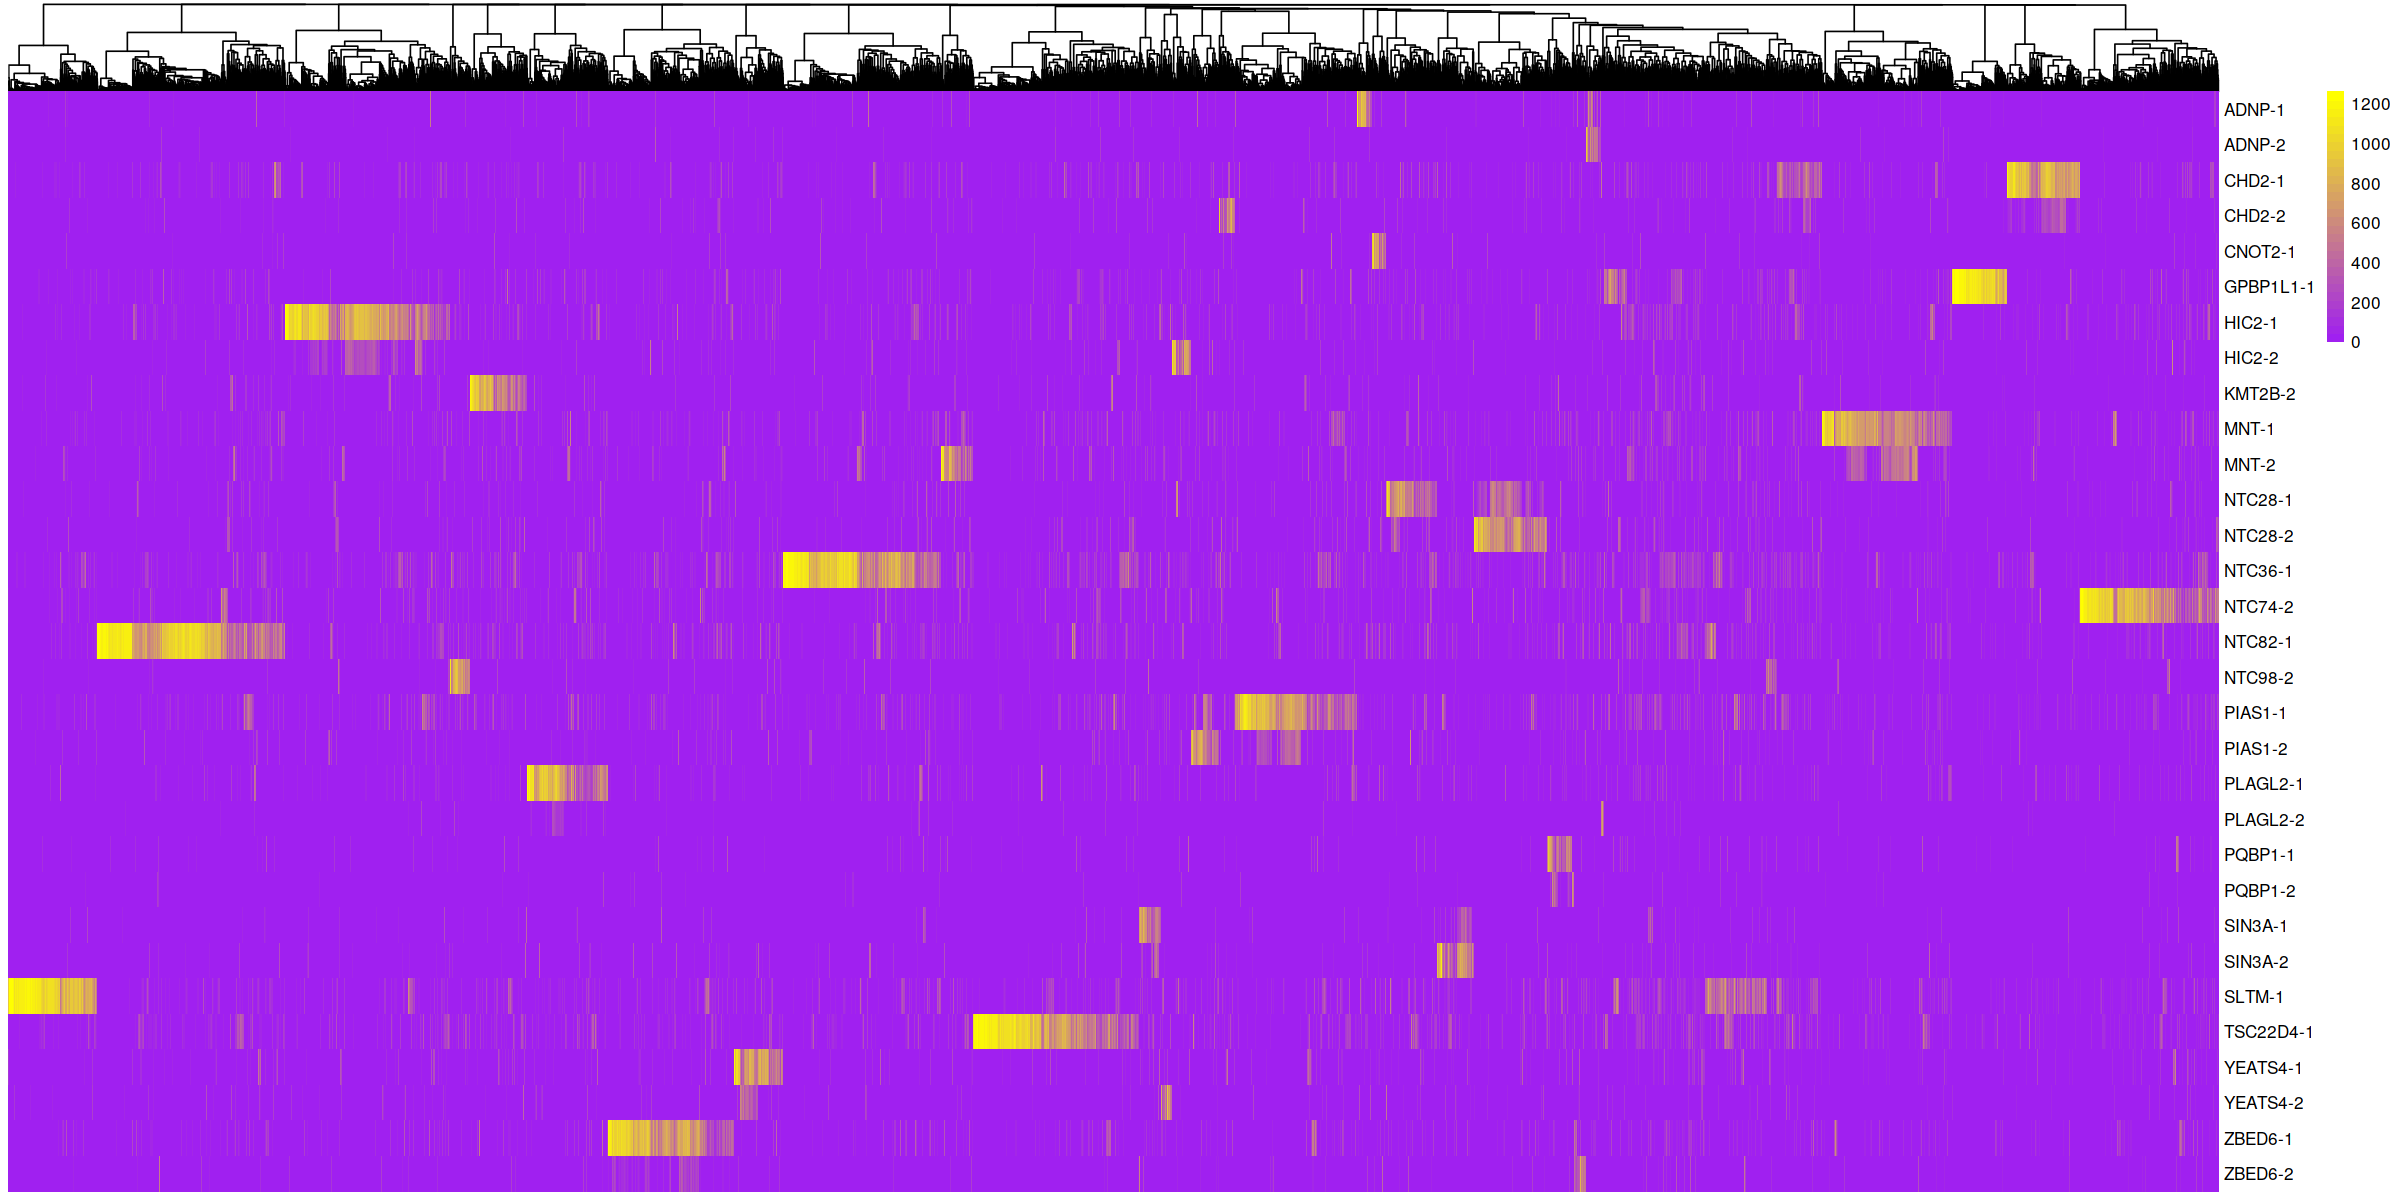

In [154]:
options(repr.plot.width = 20, repr.plot.height = 10)
# Create a color map
color_map <- colorRampPalette(c("purple", "yellow"))(30)
pheatmap(matrix, color = color_map, show_rownames = TRUE, show_colnames = FALSE, scale = "none", cluster_cols=T, cluster_rows = F)


In [155]:
saveRDS(seurat, "seurat/dasa1_ngc_heatmap_sobj.rds")